In [1]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def compute_jaccard(set1,set2):
    """ return the jaccard index of two sets: intersection / union """
    return float(len(set1.intersection(set2))) / len(set1.union(set2))

In [3]:
def compute_stats_constants(prediction,label,num_nodes): #num_nodes the number of sunits
    """ compare prediction set against label set, where both sets hold node states
    assumes that neither set is empty """
    
    #edge cases
    if len(label)==0 and len(prediction)==0: #consider a perfect prediction, all nodes are true negatives
        stats={'tps':1.0,'fns':0.0,'fps':0.0,'tns':1.0,'avg_sim':1.0,'accuracy':1.0,'errors':0.0,'recall':1.0,'precision':1.0}
        return stats
    elif len(label)==0: #tp=fn=0
        fp=float(len(prediction))
        fps=fp/num_nodes
        accuracy=(num_nodes-fp)/num_nodes
        stats={'tps':1.0,'fns':0.0,'fps':fps,'tns':1-fps,'avg_sim':0.0,'accuracy':accuracy,'errors':1-accuracy,'recall':1.0,'precision':0.0}
        return stats
    elif len(prediction)==0: #tp=fp=0
        fn=len(label)
        accuracy=(num_nodes-fn)/num_nodes
        stats={'tps':0.0,'fns':1.0,'fps':0.0,'tns':1.0,'avg_sim':0.0,'accuracy':accuracy,'errors':1-accuracy,'recall':0.0,'precision':1.0}
        return stats
    else:
        stats={}
    tp=float(len(prediction.intersection(label)))
    fp=float(len(prediction-label)) #extra nodes predicted
    fn=float(len(label-prediction)) #nodes missed
    tn=num_nodes-tp-fp-fn
    stats['tps']=tp/(tp+fn)
    stats['fns']=fn/(tp+fn)
    stats['fps']=fp/(fp+tn)
    stats['tns']=tn/(fp+tn)
    stats['avg_sim']=compute_jaccard(prediction,label)
    #print tp,fp,fn
    stats['accuracy']=(tp+tn)/(tp+tn+fp+fn)
    stats['errors']=1-stats['accuracy']
    stats['recall']=(tp)/(len(label))
    stats['precision']=(tp)/(tp+fp)
    return stats

In [84]:
import json
with open('CANA/cell_collective_times_new.txt') as fp:
    times=eval(fp.read())
with open('CANA/cell_collective_statistics.txt') as fp:
    cell_stats=eval(fp.read())
#cell_stats=json.load(open( "CANA/cell_collective_statistics.json" ))
#cell_stats={str(n): {str(key): cell_stats[n][key] for key in cell_stats[n]} for n in cell_stats}
#cell_stats['Body Segmentation in Drosophila 2013']={'size':17,'max_k': 4,'avg_k': 1.8823529411764706,'avg_bias':0.0}
for n in sorted(cell_stats,key=lambda x: cell_stats[x]['size'])[:]:
    if not 'LUT TN' in times[n]: continue
    #print n,cell_stats[n]['avg_k'],cell_stats[n]['max_k'],cell_stats[n]['size'],cell_stats[n]['edges']
    #print times[n]
print len(times),len(cell_stats)

75 75


Comparing 74 networks
74


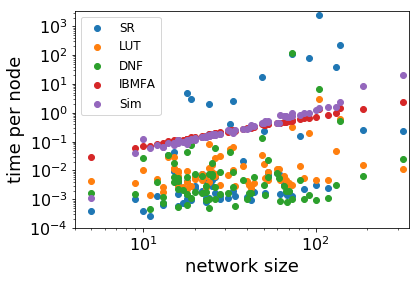

In [6]:
#scatter plot of times
num=1 #which seed set size to compare; note: normalization below does not work with seed sizes other than num=1
subnetworks=[n for n in times if times[n] and 'DNF' in times[n] and 1 in times[n]['DNF']]
print 'Comparing %d networks' % len(subnetworks)

yvaluesSR=[times[n]['SR'][num]+times[n]['SR TN']/(cell_stats[n]['size']*2) for n in subnetworks] #with DCM TN, normalized per node
yvaluesltn=[times[n]['LUT'][num]+times[n]['LUT TN']/(cell_stats[n]['size']*2) for n in subnetworks] #with LUT TN, normalized per node
yvaluesdtn=[times[n]['DNF'][num]+times[n]['DNF TN']/(cell_stats[n]['size']*2) for n in subnetworks] #with DNF TN, normalized per node
yvaluesMF=[times[n]['MF'][num] for n in subnetworks]
yvaluesSim=[times[n]['BF'][num] if 'BF' in times[n] else times[n]['Sim'][num] for n in subnetworks]
xvalues=[cell_stats[n]['size'] for n in subnetworks]
print len(xvalues)

plt.scatter(xvalues,yvaluesSR,label='SR')
plt.scatter(xvalues,yvaluesltn,label='LUT')
plt.scatter(xvalues,yvaluesdtn,label='DNF')
plt.scatter(xvalues,yvaluesMF,label='IBMFA')
plt.scatter(xvalues,yvaluesSim,label='Sim')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("network size",fontsize=18)
plt.ylabel("time per node",fontsize=18)
plt.yscale('log',basey=10)
plt.xscale('log',basex=10)
plt.ylim([.0001,3500])
plt.xlim([4,350])
plt.legend(fontsize=12)

Comparing 74 networks
74


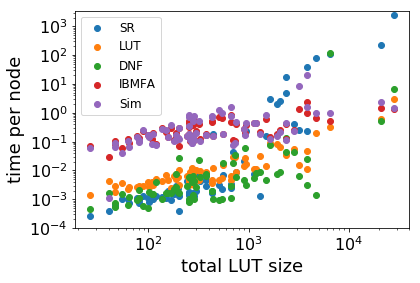

In [7]:
#repeat time graph based on LUT entries rather than network size
with open('CANA/cell_collective_LUT_sizes.txt') as fp:
    lut_sizes=eval(fp.read())
lut_sizes['Body Segmentation in Drosophila 2013']=80
len(lut_sizes)
num=1
print 'Comparing %d networks' % len(subnetworks)

yvaluesSR=[times[n]['SR'][num]+times[n]['SR TN']/(cell_stats[n]['size']*2) for n in subnetworks] #with DCM TN, normalized per node
yvaluesltn=[times[n]['LUT'][num]+times[n]['LUT TN']/(cell_stats[n]['size']*2) for n in subnetworks] #with LUT TN, normalized per node
yvaluesdtn=[times[n]['DNF'][num]+times[n]['DNF TN']/(cell_stats[n]['size']*2) for n in subnetworks] #with DNF TN, normalized per node
yvaluesMF=[times[n]['MF'][num] for n in subnetworks]
yvaluesSim=[times[n]['BF'][num] if 'BF' in times[n] else times[n]['Sim'][num] for n in subnetworks]
xvalues=[lut_sizes[n] for n in subnetworks]
print len(xvalues)

plt.scatter(xvalues,yvaluesSR,label='SR')
plt.scatter(xvalues,yvaluesltn,label='LUT')
plt.scatter(xvalues,yvaluesdtn,label='DNF')
plt.scatter(xvalues,yvaluesMF,label='IBMFA')
plt.scatter(xvalues,yvaluesSim,label='Sim')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("total LUT size",fontsize=18)
plt.ylabel("time per node",fontsize=18)
plt.yscale('log',basey=10)
plt.xscale('log',basex=10)
plt.ylim([.0001,3500])
#plt.xlim([4,350])
plt.legend(fontsize=12)

In [8]:
#find number of seeds per seed set size
#import re
sizes={n:{} for n in times}
with open('CANA/cell_collective_stats.txt') as fp:
    for i,line in enumerate(fp):
        if i%11==0: 
            name=line[:line.find(".")-2] #re.findall('[A-z -+]+',line)[0].strip() - issues with '-'
            if name not in times:print i,line
        if i%11==1:
            sizes[name][1]=int(line.split(": ")[1])
        if i%11==2:
            sizes[name][2]=int(line.split(": ")[1])
        if i%11==3:
            sizes[name][3]=int(line.split(": ")[1])
sizes['Body Segmentation in Drosophila 2013']={1:34,2:544,3:1000}
len(sizes)#,sizes

75

Comparing 1 networks Body Segmentation in Drosophila 2013


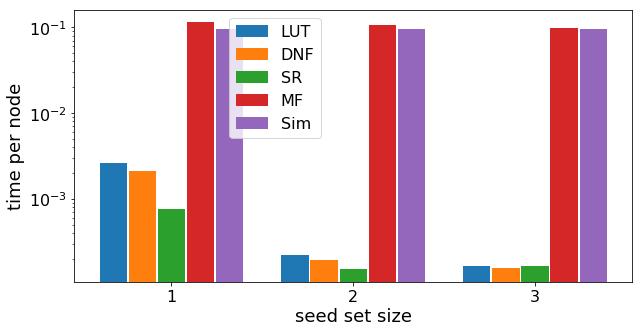

In [398]:
#bar plot time comparisons
num=3 #how many seed set sizes to compare
subnetworks=[n for n in times if times[n]]
#'Body Segmentation in Drosophila 2013','Tumour Cell Invasion and Migration','EGFR & ErbB Signaling'
subnetworks=['Body Segmentation in Drosophila 2013',] 
print 'Comparing %d networks' % len(subnetworks),subnetworks[0]

#plot average times
averageSR=[np.mean([times[n]['SR'][i]+times[n]['SR TN']/(sizes[n][i]) for n in subnetworks]) for i in range(1,num+1)] #with DCM TN
averageltn=[np.mean([times[n]['LUT'][i]+times[n]['LUT TN']/(sizes[n][i]) for n in subnetworks]) for i in range(1,num+1)] #with LUT TN
averagedtn=[np.mean([times[n]['DNF'][i]+times[n]['DNF TN']/(sizes[n][i]) for n in subnetworks]) for i in range(1,num+1)] #with DNF TN
averageMF=[np.mean([times[n]['MF'][i] for n in subnetworks]) for i in range(1,num+1)]
averageSim=[np.mean([times[n]['BF'][i] if 'BF' in times[n] else times[n]['Sim'][i] for n in subnetworks]) for i in range(1,num+1)]
xvalues=[1,2,3]
width=0.15
plt.figure(figsize=(10,5))
#print(averagedtn,averageltn)

plt.bar([x-2*width-.02 for x in xvalues],averageltn,label='LUT',width=width) #x-2*width-.02
plt.bar([x-1*width-.01 for x in xvalues],averagedtn,label='DNF',width=width)
plt.bar([x for x in xvalues],averageSR,label='SR',width=width) #x
plt.bar([x+1*width+.01 for x in xvalues],averageMF,label='MF',width=width) #x+width+.01
plt.bar([x+2*width+.02 for x in xvalues],averageSim,label='Sim',width=width) #x+2*width+.02
plt.xticks([1,2,3],[1,2,3],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("seed set size",fontsize=18)
plt.ylabel("time per node",fontsize=18)
plt.legend(fontsize=16,framealpha=0.8,bbox_to_anchor=(0.456, 0.5)) #bbox_to_anchor=(1.0, 0.72), (0.806, 0.32); fontsize=18,framealpha=0.3
plt.yscale('log',basey=10)
#plt.ylim([-.01,0.8])
#plt.figtext(0.797, 0.69, "*", wrap=True, horizontalalignment='left', fontsize=20)
#plt.figtext(0.837, 0.78, "*", wrap=True, horizontalalignment='left', fontsize=20)

In [541]:
stats={n:{'MF':{},'LUT TN':{},'SR TN':{},'ground-truth':{}} for n in times}
len(stats)

75

In [547]:
#read in modules and compare stats
total=0
num=3
dir_names=['CANA/modules_sr_new/','CANA/modules_ltn/','CANA/constants_mf/','CANA/constants_bf-sim/'] #'CANA/constants_bf-sim/',
dir_names.extend(['CANA/modules_dtn/']) #add to evaluate DNF method
dir_names.extend(['CANA/modules_dtn_pi/']) #add to evaluate DNF PI method
#dir_names.extend(['CANA/constants_sim_percentages/'+str(p)+'/' for p in [0.01,0.1,0.25,0.5,0.75]]) #add to evaluate simulations
for index,n in enumerate(sorted(cell_stats,key=lambda x: cell_stats[x]['size'])[:]):
    if cell_stats[n]['max_k']>14: continue
    #if cell_stats[n]['size']<10 or cell_stats[n]['size']>14: continue #add to evaluate simulations
    #if cell_stats[n]['size']!=14: continue #add to evaluate simulations
    #if n!='Budding Yeast Cell Cycle': continue #add to evaulate individual network
    #read in data
    with open(dir_names[0]+n+'.txt') as fp:
        constants_sr=eval(fp.read())
    with open(dir_names[1]+n+'.txt') as fp:
        constants_ltn=eval(fp.read())
    with open(dir_names[2]+n+'.txt') as fp:
        constants_mf=eval(fp.read())
    with open(dir_names[3]+n+'.txt') as fp:
        constants_sim=eval(fp.read())
    try:
        with open(dir_names[4]+n+'.txt') as fp:
            constants_dtn=eval(fp.read())
        with open(dir_names[5]+n+'.txt') as fp: #add to evaluate DNF PI method
            constants_pi=eval(fp.read())
    except: continue
    #for i,p in enumerate(['01','10','25','50','75']): #add to evaluate simulations
    #    with open(dir_names[5+i]+n+'.txt') as fp:
    #        exec('constants_sim'+p+'=eval(fp.read())')
    #constants_sim100=constants_sim #add to evaluate individual network
    #with open('CANA/Budding Yeast Cell Cycle_simulations500_constants.txt') as fp: #add to evaluate individual network
    #    constants_sim500=eval(fp.read())
    #with open('CANA/Budding Yeast Cell Cycle_simulations1000_constants.txt') as fp: #add to evaluate individual network
    #    constants_sim=eval(fp.read()) #'ground-truth'
    print len(constants_dtn),#len(constants_sim01)
    #add early exit for bad network seeds
    if {key for key in constants_sim.keys() if len(key)==1}!={key for key in constants_dtn.keys() if len(key)==1}: 
        print n,'False',{key for key in constants_sim.keys() if len(key)==1}-{key for key in constants_dtn.keys() if len(key)==1},
        print {key for key in constants_dtn.keys() if len(key)==1}-{key for key in constants_sim.keys() if len(key)==1}
        continue
    else: pass #print n,'True'#print constants_sim.keys(),constants_dtn.keys()
    
    #get stats
    keys,constants=['SR TN','LUT TN','MF','ground-truth'],[constants_sr,constants_ltn,constants_mf,constants_sim]
    keys.extend(['DNF TN']) #add to evaluate DNF method
    constants.extend([constants_dtn])
    keys.extend(['DNF PI TN']) #add to evaluate DNF PI method
    constants.extend([constants_pi])
    #keys.extend(['sim'+p for p in ['01','10','25','50','75']]) #add to evaluate simulations
    #keys.extend(['sim100','sim500']) #add to evaluate individual network
    stats[n]={key:{} for key in keys} #add to evaluate simulations
    #constants.extend([eval('constants_sim'+p) for p in ['01','10','25','50','75']]) #add to evaluate simulations
    #constants.extend([constants_sim100,constants_sim500]) #add to evaluate individual network
    print n,[len(c) for c in constants] #keys,
    
    for key,dic in zip(keys,constants):
        stats[n][key]['size']={i:np.mean([len(dic[seed]) for seed in dic if len(seed)==i]) for i in range(1,num+1)} #module length
        stats[n][key]['similarity']={i:0.0 for i in range(1,num+1)}
        stats[n][key]['recall']={i:0.0 for i in range(1,num+1)}
        stats[n][key]['precision']={i:0.0 for i in range(1,num+1)}
        
        for i in range(1,num+1):
            #print key,i
            tot_stats={'tps':0.0,'fns':0.0,'fps':0.0,'tns':0.0,'avg_sim':0.0,'accuracy':0.0,'errors':0.0,'recall':0.0,'precision':0.0}
            seeds={seed for seed in dic if len(seed)==i}
            for seed in seeds: #all dicts should have the same keys across methods
                set1,set2=dic[seed],constants_sim[seed] #compare to ground truth
                seed_stats=compute_stats_constants(set1,set2,cell_stats[n]['size']*2) #for binary networks
                for stat in seed_stats: tot_stats[stat]+=seed_stats[stat]
            tot_stats={stat:tot_stats[stat]/len(seeds) for stat in tot_stats}
            #print_stats(tot_stats,len(seeds))
            #print len(seeds),"total seeds"
            stats[n][key]['similarity'][i]=tot_stats['avg_sim']
            stats[n][key]['recall'][i]=tot_stats['recall']
            stats[n][key]['precision'][i]=tot_stats['precision']

    #print n#,stats[n]
    total+=1
    #break
total

130 Cortical Area Development [130, 130, 130, 130, 130, 130]
834 Cell Cycle Transcription by Coupled CDK and Network Oscillators [834, 834, 834, 834, 834, 834]
1160 Mammalian Cell Cycle 2006 [1160, 1160, 1160, 1160, 1160, 1160]
1242 Toll Pathway of Drosophila Signaling Pathway [1242, 1242, 1242, 1242, 1242, 1242]
1288 Metabolic Interactions in the Gut Microbiome [1288, 1288, 1288, 1288, 1288, 1288]
1338 Lac Operon [1338, 1338, 1338, 1338, 1338, 1338]
1338 Regulation of the L-arabinose operon of Escherichia coli [1338, 1338, 1338, 1338, 1338, 1338]
1392 Arabidopsis thaliana Cell Cycle [1392, 1392, 1392, 1392, 1392, 1392]
1450 Predicting Variabilities in Cardiac Gene [1450, 1450, 1450, 1450, 1450, 1450]
1450 Cardiac development [1450, 1450, 1450, 1450, 1450, 1450]
1450 Fanconi anemia and checkpoint recovery [1450, 1450, 1450, 1450, 1450, 1450]
1512 Neurotransmitter Signaling Pathway [1512, 1512, 1512, 1512, 1512, 1512]
1512 BT474 Breast Cell Line Short-term ErbB Network [1512, 1512, 1512

74

In [552]:
#with open('CANA/cell_collective_bruteforce_analysis.txt','w') as fp:
#    fp.write(str(stats))
#with open('CANA/cell_collective_analysis_PIs.txt','w') as fp:
#    fp.write(str(stats))

Comparing 74 networks ([3.817435337216043, 7.123420020281138, 10.027660955598455], [4.714495387628887, 8.004673775411375, 10.849448680823679])


Text(0,0.5,'avg. size')

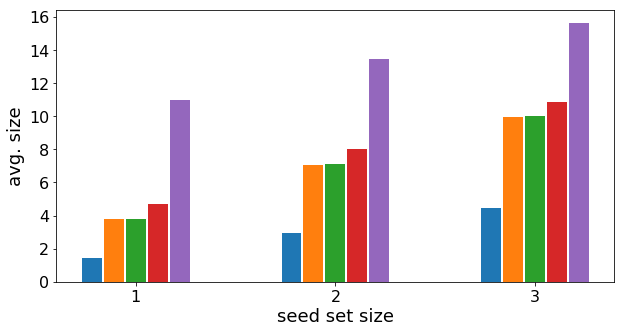

In [553]:
#plot average size, similarity, recall, or precision
num=3 #how many seed set sizes to compare
stat='size'
subnetworks=[n for n in stats if 'DNF TN' in stats[n]]# and cell_stats[n]['size']>9 and cell_stats[n]['size']<15] #N=[10,13]
print 'Comparing %d networks' % len(subnetworks),#[n for n in subnetworks]

#plot average module lengths
averageSR=[np.mean([stats[n]['SR TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
averagedtn=[np.mean([stats[n]['DNF TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
averageltn=[np.mean([stats[n]['LUT TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
averageMF=[np.mean([stats[n]['MF'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
averageSim=[np.mean([stats[n]['ground-truth'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
xvalues=[1,2,3]
width=0.1
plt.figure(figsize=(10,5))
#for y in [averageSR,averagedtn,averageltn,averageMF,averageSim]:
#    for i,x in enumerate(y): y[i]=round(x,2)
print(averageSR,averageMF)

plt.bar([x-2.0*width-.02 for x in xvalues],averageltn,label='LUT',width=width) #x-2*width-.02
plt.bar([x-1.0*width-.01 for x in xvalues],averagedtn,label='DNF',width=width)
plt.bar([x for x in xvalues],averageSR,label='SR',width=width) #x
plt.bar([x+1.0*width+.01 for x in xvalues],averageMF,label='MF',width=width) #x+width+.01
plt.bar([x+2.0*width+.02 for x in xvalues],averageSim,label='Sim',width=width) #x+2*width+.02
plt.xticks([1,2,3],[1,2,3],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("seed set size",fontsize=18)
plt.ylabel("avg. "+stat,fontsize=18)
#plt.ylim([0,7])
#plt.legend(fontsize=18)#,framealpha=0.3,bbox_to_anchor=(1.0, 0.8))

In [470]:
#comparison to brute-force for small networks
with open('CANA/cell_collective_bruteforce_analysis.txt') as fp:
    stats=eval(fp.read())
len(stats)

6

Comparing 6 networks ['Regulation of the L-arabinose operon of Escherichia coli', 'Mammalian Cell Cycle 2006', 'Lac Operon', 'Metabolic Interactions in the Gut Microbiome', 'Arabidopsis thaliana Cell Cycle', 'Toll Pathway of Drosophila Signaling Pathway']
[3.9310703185703186, 6.359171846671848, 8.236833333333333]
[3.626449938949939, 5.72031117031117, 7.2185625]
[3.550625763125763, 5.6830243830243825, 7.18075]
[3.550625763125763, 5.66486198986199, 7.162465277777777]
[3.550625763125763, 5.658497520997521, 7.15992361111111]


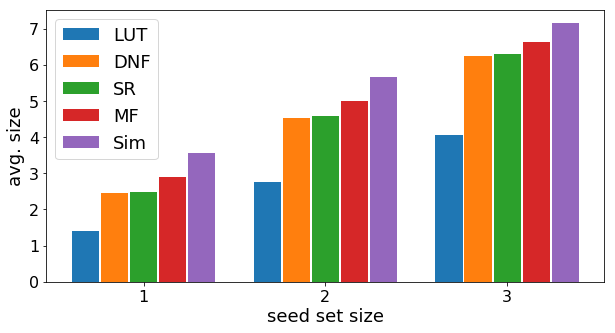

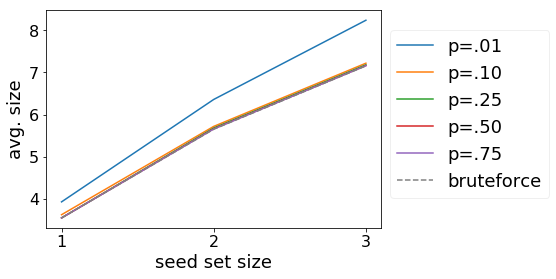

In [472]:
#plot average size, similarity, recall, or precision; show stats comparing simulations to brute-force answers
num=3 #how many seed set sizes to compare
stat='size'
subnetworks=[n for n in stats if stat in stats[n]['SR TN'] and cell_stats[n]['size']>9 and cell_stats[n]['size']<15] #N=[10,13]
print 'Comparing %d networks' % len(subnetworks),[n for n in subnetworks]

#plot average module lengths
averageSR=[np.mean([stats[n]['SR TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
averagedtn=[np.mean([stats[n]['DNF TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
averageltn=[np.mean([stats[n]['LUT TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
averageMF=[np.mean([stats[n]['MF'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
averageSim=[np.mean([stats[n]['ground-truth'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
for key in ['sim'+p for p in ['01','10','25','50','75']]:
    exec('average'+key+'=[np.mean([stats[n][key][stat][i] for n in subnetworks]) for i in range(1,num+1)]')
    print eval('average'+key)
xvalues=[1,2,3]
width=0.15
plt.figure(figsize=(10,5))

plt.bar([x-2*width-.02 for x in xvalues],averageltn,label='LUT',width=width) #x-2*width-.02
plt.bar([x-width-.01 for x in xvalues],averagedtn,label='DNF',width=width)
plt.bar([x for x in xvalues],averageSR,label='SR',width=width) #x
plt.bar([x+width+.01 for x in xvalues],averageMF,label='MF',width=width) #x+width+.01
plt.bar([x+2*width+.02 for x in xvalues],averageSim,label='Sim',width=width) #x+2*width+.02
plt.xticks([1,2,3],[1,2,3],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("seed set size",fontsize=18)
plt.ylabel("avg. "+stat,fontsize=18)
#plt.ylim([0,7])
plt.legend(fontsize=18)#,framealpha=0.3,bbox_to_anchor=(1.0, 0.8))
plt.show()

labels=['p=.'+p for p in ['01','10','25','50','75']]
for i,key in enumerate(['sim'+p for p in ['01','10','25','50','75']]):
    plt.plot(xvalues,eval('average'+key),label=labels[i])
    #plt.plot(xvalues,eval('average'+key),label=labels[i])
if stat=='size': plt.plot(xvalues,averageSim,'--',label='bruteforce',color='grey')
plt.xticks([1,2,3],[1,2,3],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("seed set size",fontsize=18)
plt.ylabel("avg. "+stat,fontsize=18)
#plt.ylim([0.7,1.0])
plt.legend(fontsize=18,framealpha=0.3,bbox_to_anchor=(1.0, 0.95))
#plt.figtext(0.797, 0.69, "*", wrap=True, horizontalalignment='left', fontsize=20)
#plt.figtext(0.837, 0.78, "*", wrap=True, horizontalalignment='left', fontsize=20)

Comparing 1 networks ['Budding Yeast Cell Cycle']
[0.9438446969696971, 0.9739621051463156, 0.9887121739371738]
[0.9875, 0.9989400584795322, 0.9989055555555557]


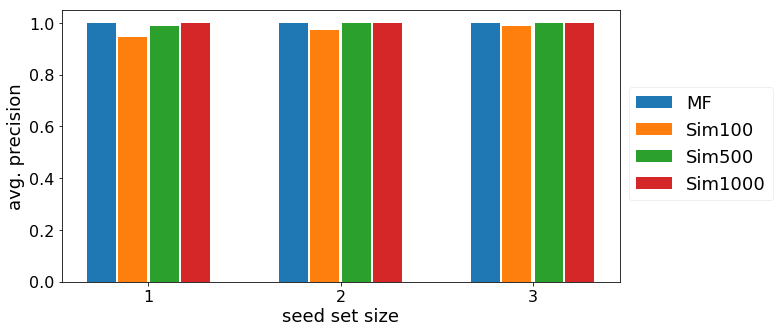

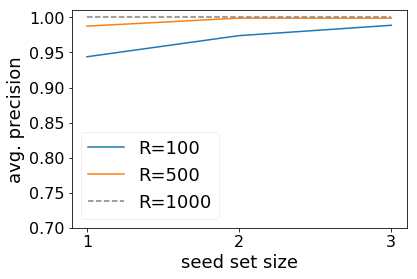

In [89]:
#single network plot for additional runs
#plot average size, similarity, recall, or precision; show stats comparing simulations to brute-force answers
num=3 #how many seed set sizes to compare
stat='precision'
subnetworks=['Budding Yeast Cell Cycle']
print 'Comparing %d networks' % len(subnetworks),[n for n in subnetworks]

#plot average module lengths
averageSR=[np.mean([stats[n]['SR TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
#averagedtn=[] #TODO
averageltn=[np.mean([stats[n]['LUT TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
averageMF=[np.mean([stats[n]['MF'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
averageSim=[np.mean([stats[n]['ground-truth'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
for key in ['sim'+p for p in ['100','500']]:
    exec('average'+key+'=[np.mean([stats[n][key][stat][i] for n in subnetworks]) for i in range(1,num+1)]')
    print eval('average'+key)
xvalues=[1,2,3]
width=0.15
plt.figure(figsize=(10,5))

plt.bar([x-1.5*width-.02 for x in xvalues],averageMF,label='MF',width=width) #x-2*width-.02
#plt.bar([x-width-.01 for x in xvalues],averagedtn,label='DNF',width=width)
plt.bar([x-.5*width-.01 for x in xvalues],averagesim100,label='Sim100',width=width) #x
plt.bar([x+.5*width+.01 for x in xvalues],averagesim500,label='Sim500',width=width) #x+width+.01
plt.bar([x+1.5*width+.02 for x in xvalues],averageSim,label='Sim1000',width=width) #x+2*width+.02
plt.xticks([1,2,3],[1,2,3],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("seed set size",fontsize=18)
plt.ylabel("avg. "+stat,fontsize=18)
#plt.legend(fontsize=18)#,framealpha=0.3,bbox_to_anchor=(1.0, 0.8))
plt.legend(fontsize=18,framealpha=0.3,bbox_to_anchor=(1.0, 0.75))
plt.show()

labels=['R='+p for p in ['100','500']]
for i,key in enumerate(['sim'+p for p in ['100','500']]):
    plt.plot(xvalues,eval('average'+key),label=labels[i])
    #plt.plot(xvalues,eval('average'+key),label=labels[i])
if stat: plt.plot(xvalues,averageSim,'--',label='R=1000',color='grey') #=='size'
plt.xticks([1,2,3],[1,2,3],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("seed set size",fontsize=18)
plt.ylabel("avg. "+stat,fontsize=18)
plt.ylim([0.7,1.01])
plt.legend(fontsize=18,framealpha=0.3)#,bbox_to_anchor=(1.0, 0.95))
#plt.figtext(0.797, 0.69, "*", wrap=True, horizontalalignment='left', fontsize=20)
#plt.figtext(0.837, 0.78, "*", wrap=True, horizontalalignment='left', fontsize=20)

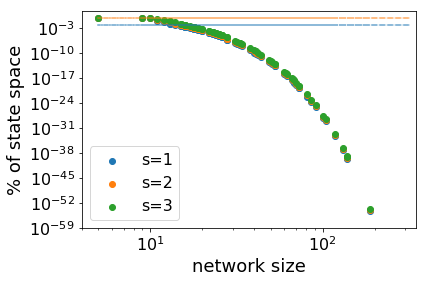

In [467]:
#plots of cell collective sizes vs % of state space sampled, assuming R=100 runs
runs=100.0
xvalues=[cell_stats[n]['size'] for n in cell_stats]
y1values=[runs/(2**(cell_stats[n]['size']-1)) if cell_stats[n]['size']>10 else 1.0 for n in cell_stats] #N=10 or less, we use bruteforce
y2values=[runs/(2**(cell_stats[n]['size']-2)) if cell_stats[n]['size']>10 else 1.0 for n in cell_stats]
y3values=[runs/(2**(cell_stats[n]['size']-3)) if cell_stats[n]['size']>10 else 1.0 for n in cell_stats]
#print len(xvalues),zip(sorted(xvalues),sorted(y3values,reverse=True))

plt.scatter(xvalues,y1values,label='s=1') #specify seed set size
plt.scatter(xvalues,y2values,label='s=2') #specify seed set size
plt.scatter(xvalues,y3values,label='s=3') #specify seed set size
plt.plot(xvalues,[.01 for x in xvalues],'--',alpha=0.5)
plt.plot(xvalues,[1.0 for x in xvalues],'--',alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("network size",fontsize=18)
plt.ylabel("% of state space",fontsize=18)
plt.yscale('log',basey=10)
plt.xscale('log',basex=10)
plt.ylim([10e-60,100])
plt.xlim([4,350])
plt.legend(fontsize=16)

In [187]:
def is_sunit(s):
    """ determines if a particular unit is an s-unit based on the name """
    if not s or len(s)<3 or not s[-1].isdigit() or s[:3]=='F-T' or ((s[:2]=='F-' or s[:2]=='T-') and '_' in s):
        return False
    return True

def sunit_to_var(s):
    """ extract variable from s-unit name """
    return s[:-2]

In [194]:
#convert seeds to DNF ASCII versions to calculate DNF modules and out-degrees
illegals={'/',';','-','+','*','.'}

def convert_seeds_ascii(seeds,name=None):
    new_seeds=set([])
    for seed in seeds:
        new_seed={s for s in seed}
        for illegal in illegals:
            new_seed={s[:-2].replace(illegal,'a'+str(ord(illegal))+'a')+s[-2:] for s in new_seed}
            
        #special cases
        if name=="PC12 Cell Differentiation":
            new_seed={s.replace('G(ia47ao)','Ga40aia47aoa41a') for s in new_seed} #replace only these parentheses
        if name=="Signaling Pathway for Butanol Production in Clostridium beijerinckii NRRL B-598":
            new_seed={s.replace('NAD(P)H','NADa40aPa41aH') for s in new_seed}
            new_seed={s.replace('3a45ahydroxybutyryla45aCoA','a51aa45ahydroxybutyryla45aCoA') for s in new_seed}
        if name=="TOL Regulatory Network": #replace leading number
            new_seed={s.replace('3MBz','a51aMBz') for s in new_seed}
        if name=="Signal Transduction in Fibroblasts":
            new_seed={s.replace('Palpha_iR','PalphaiR') for s in new_seed} #causes issue with DNF variable replacement
            new_seed={s.replace('Palpha_1213R','Palpha1213R') for s in new_seed}
            new_seed={s.replace('Palpha_sR','PalphasR') for s in new_seed}
        if name=="SKBR3 Breast Cell Line Long-term ErbB Network":
            new_seed={s.replace('ERBB2','ER_BB2') for s in new_seed} #causes issue with DNF variable replacement
        if name=="Signaling Pathway for Butanol Production in Clostridium beijerinckii NRRL B-598":
            new_seed={s.replace("acetaldehyde","acetal_dehyde") for s in new_seed} #causes issue with DNF variable replacement
        if name=="IL-6 Signalling":
            new_seed={s.replace("camk24","camk_24") for s in new_seed} #causes issue with DNF variable replacement
            new_seed={s.replace("dum_gab1_kin_or_jak1_gab1_mem_p","dum_gab1_kin_jak1_gab1memp") for s in new_seed}
            new_seed={s.replace("dum_il6rc_p_or_grb2_vav","dum_il6rc_p_grb2_vav") for s in new_seed}
            new_seed={s.replace("dum_mtorc1_or_pkcd_stat3_ta","dum_mtorc1_pkcd_stat3_ta") for s in new_seed}
        if name=="Signaling in Macrophage Activation":
            new_seed={s.replace("BAG4_TNFRSF1A","BAG4_TN_FRSF1A") for s in new_seed}
            new_seed={s.replace("TNF_BAG4_TN_FRSF1A","TN_BAG4_TN_RSF1A") for s in new_seed}
        if name=="T Cell Receptor Signaling": #causes issue with DNF variable replacement
            new_seed={s.replace("vav1","vaa118a1") for s in new_seed}
        #print seed,new_seed
        new_seeds.add(frozenset(new_seed))
    return new_seeds
                      
#convert_seeds_ascii(seeds,name="IL-6 Signalling")

In [219]:
#convert from DNF ascii names to standard names used in expression files
illegals={'/',';','-','+','*','.'}

def convert_seeds_standard(dic,name=""):
    new_dic={}
    for key in dic:
        new_key={s for s in key}
        new_value=dic[key]
        #print new_key,new_value
            
        #special cases first
        if name=="PC12 Cell Differentiation":
            new_key={s.replace('Ga40aia47aoa41a','G(ia47ao)') for s in new_key} #replace only these parentheses
        if name=="Signaling Pathway for Butanol Production in Clostridium beijerinckii NRRL B-598":
            new_key={s.replace('NADa40aPa41aH','NAD(P)H') for s in new_key}
            new_key={s.replace('a51aa45ahydroxybutyryla45aCoA','3a45ahydroxybutyryla45aCoA') for s in new_key}
            new_key={s.replace("acetal_dehyde","acetaldehyde") for s in new_key} #causes issue with DNF variable replacement
        if name=="TOL Regulatory Network": #replace leading number
            new_key={s.replace('a51aMBz','3MBz') for s in new_key}
        if name=="Signal Transduction in Fibroblasts":
            new_key={s.replace('PalphaiR','Palpha_iR') for s in new_key} #causes issue with DNF variable replacement
            new_key={s.replace('Palpha1213R','Palpha_1213R') for s in new_key}
            new_key={s.replace('PalphasR','Palpha_sR') for s in new_key}
        if name=="SKBR3 Breast Cell Line Long-term ErbB Network":
            new_key={s.replace('ER_BB2','ERBB2') for s in new_key} #causes issue with DNF variable replacement
        if name=="IL-6 Signalling":
            new_key={s.replace("camk_24","camk24") for s in new_key} #causes issue with DNF variable replacement
            new_key={s.replace("dum_gab1_kin_jak1_gab1memp","dum_gab1_kin_or_jak1_gab1_mem_p") for s in new_key}
            new_key={s.replace("dum_il6rc_p_grb2_vav","dum_il6rc_p_or_grb2_vav") for s in new_key}
            new_key={s.replace("dum_mtorc1_pkcd_stat3_ta","dum_mtorc1_or_pkcd_stat3_ta") for s in new_key}
        if name=="Signaling in Macrophage Activation":
            new_key={s.replace("TN_BAG4_TN_RSF1A","TNF_BAG4_TN_FRSF1A") for s in new_key}
            new_key={s.replace("BAG4_TN_FRSF1A","BAG4_TNFRSF1A") for s in new_key}          
        if name=="T Cell Receptor Signaling": #causes issue with DNF variable replacement 'TNF_BAG4_TNFRSF1A-1'
            new_key={s.replace("vaa118a1","vav1") for s in new_key}
            
        for illegal in illegals:
            new_key={s[:-2].replace('a'+str(ord(illegal))+'a',illegal)+s[-2:] for s in new_key}

        #if key!=new_key: print key,new_key,'\n'
        new_dic[frozenset(new_key)]=new_value
    return new_dic

#convert_seeds_standard(dic_in,name=n)#[frozenset(['T-0', 'Ge-1', 'Ara+-0'])]

In [228]:
#write dynamical rankings to file
from scipy.stats import spearmanr
keys=['LUT','SR','MF','Sim','DNF']
max_num=3
rankings={n:{key:{} for key in keys} for n in cell_stats}
dir_names=['CANA/modules_sr_new/','CANA/modules_ltn/','CANA/constants_mf/','CANA/constants_bf-sim/','CANA/modules_dtn/']
write_dir=[] #make sure this is parallel to the above list!
write=False #set to True to write to file
for index,n in enumerate(sorted(cell_stats,key=lambda x: cell_stats[x]['size'])[:]):
    if cell_stats[n]['max_k']>14: continue
    #read in data
    with open(dir_names[0]+n+'.txt') as fp:
        constants_sr=eval(fp.read())
    with open(dir_names[1]+n+'.txt') as fp:
        constants_ltn=eval(fp.read())
    with open(dir_names[2]+n+'.txt') as fp:
        constants_mf=eval(fp.read())
    with open(dir_names[3]+n+'.txt') as fp:
        constants_sim=eval(fp.read())
    with open(dir_names[4]+n+'.txt') as fp:
        constants_dtn=eval(fp.read())
    print len(constants_sim),n
    
    #calculate dynamical rankings
    rankings_ltn=sorted(constants_ltn,key=lambda x:len(constants_ltn[x]),reverse=True) #for modules
    rankings_sr=sorted(constants_sr,key=lambda x:len(constants_sr[x]),reverse=True)
    rankings_mf=sorted(constants_mf,key=lambda x:len(constants_mf[x]),reverse=True)
    rankings_sim=sorted(constants_sim,key=lambda x:len(constants_sim[x]),reverse=True)
    rankings_dtn=sorted(constants_dtn,key=lambda x:len(constants_dtn[x]),reverse=True)
    
    
    #print rankings_sim[:10]
    #for m in sorted(constants_sim,key=lambda x:len(constants_sim[x]),reverse=True): print m,constants_sim[m]
    #compare rankings between different measures
    print len(rankings_sr),len(rankings_ltn),len(rankings_mf),len(rankings_sim),len(rankings_dtn)
    labels=['LUT','SR','MF','Sim','DNF','in-degree','out-degree','total degree','LUT TN in-degree','LUT TN out-degree','LUT TN total degree','DNF TN in-degree','DNF TN out-degree','DNF TN total degree','SR TN in-degree','SR TN out-degree','SR TN total degree']
    ls=[rankings_ltn,rankings_sr,rankings_mf,rankings_sim,rankings_dtn]#,rankings_SG_in,rankings_SG_out,rankings_SG_tot]
    #ls.extend([rankings_ltn_in,rankings_ltn_out,rankings_ltn_tot,rankings_dtn_in,rankings_dtn_out,rankings_dtn_tot,rankings_TN_in,rankings_TN_out,rankings_TN_tot])
    for i,d1 in enumerate(ls):
        for j,d2 in enumerate([rankings_sim]):
            #print "comparing {} with {}".format(labels[i],'Sim') #labels[j]
            for num in range(1,max_num+1):
                r1=[str(sorted(list(r))) for r in d1 if len(r)==num] #set to restrict by seed set size
                r2=[str(sorted(list(r))) for r in d2 if len(r)==num] #set to restrict by seed set size
                xvalues=[k for k in range(len(r2))] #change to numeric labels
                yvalues=[r1.index(val) for val in r2] #change to numeric labels
                #print r1[:5],r2[:5],xvalues[:5],yvalues[:5]
                #print num,spearmanr(xvalues,yvalues),len(xvalues),len(yvalues)
                rankings[n][labels[i]][num]=spearmanr(xvalues,yvalues)[0]

print len(rankings)

130 Cortical Area Development
130 130 130 130 130
834 Cell Cycle Transcription by Coupled CDK and Network Oscillators
834 834 834 834 834
1160 Mammalian Cell Cycle 2006
1160 1160 1160 1160 1160
1242 Toll Pathway of Drosophila Signaling Pathway
1242 1242 1242 1242 1242
1288 Metabolic Interactions in the Gut Microbiome
1288 1288 1288 1288 1288
1338 Lac Operon
1338 1338 1338 1338 1338
1338 Regulation of the L-arabinose operon of Escherichia coli
1338 1338 1338 1338 1338
1392 Arabidopsis thaliana Cell Cycle
1392 1392 1392 1392 1392
1450 Predicting Variabilities in Cardiac Gene
1450 1450 1450 1450 1450
1450 Cardiac development
1450 1450 1450 1450 1450
1450 Fanconi anemia and checkpoint recovery
1450 1450 1450 1450 1450
1512 Neurotransmitter Signaling Pathway
1512 1512 1512 1512 1512
1512 BT474 Breast Cell Line Short-term ErbB Network
1512 1512 1512 1512 1512
1512 HCC1954 Breast Cell Line Short-term ErbB Network
1512 1512 1512 1512 1512
1512 SKBR3 Breast Cell Line Short-term ErbB Network
151

In [230]:
#calculate structural rankings
import pickle
with open('CANA/cell_collective_degrees.txt') as fp: #original graph
    degrees=eval(fp.read())

for index,n in enumerate(sorted(cell_stats,key=lambda x: cell_stats[x]['size'])[:]):
    if cell_stats[n]['max_k']>14: continue
    with open('CANA/constants_bf-sim/'+n+'.txt') as fp:
        constants_sim=eval(fp.read())
    seeds=constants_sim.keys()
    rankings_sim=sorted(constants_sim,key=lambda x:len(constants_sim[x]),reverse=True) #ground-truth to compare against
    print n,len(seeds),
    #read in graphs
    ltn=pickle.load(open('CANA/LUT GTN/'+n.replace(" ","_")))
    tn=pickle.load(open('CANA/SR GTN/'+n.replace(" ","_")))
    dtn=pickle.load(open('CANA/DNF GTN/'+n.replace(" ","_")))
    print len(ltn),len(tn),len(dtn)
    vnames=['rankings_SG_','rankings_ltn_','rankings_TN_','rankings_dtn_']
    dics=['structural',ltn,tn,dtn]
    
    for i,graph in enumerate(dics):
        if graph=='structural': #original graph
            inputs=degrees[n]['inputs']
            outputs=degrees[n]['outputs']
            dic_in={seed:sum([inputs[sunit_to_var(node)] for node in seed]) for seed in seeds}
            dic_out={seed:sum([outputs[sunit_to_var(node)] for node in seed]) for seed in seeds}
            dic_tot={seed:sum([inputs[sunit_to_var(node)]+outputs[sunit_to_var(node)] for node in seed]) for seed in seeds}
        else: #GTN
            if i==3: #DNF needs to convert names; this must be run last as it changes seeds
                seeds=convert_seeds_ascii(seeds,name=n)
            inputs={node:len(graph.predecessors(node)) for node in graph.nodes() if is_sunit(node)}
            outputs={node:len(graph.neighbors(node)) for node in graph.nodes() if is_sunit(node)} 
            dic_in={seed:sum([inputs[node] for node in seed]) for seed in seeds}
            dic_out={seed:sum([outputs[node] for node in seed]) for seed in seeds}
            dic_tot={seed:sum([inputs[node]+outputs[node] for node in seed]) for seed in seeds}
            if i==3: #DNF needs to convert names back
                dic_in=convert_seeds_standard(dic_in,name=n)
                dic_out=convert_seeds_standard(dic_out,name=n)
                dic_tot=convert_seeds_standard(dic_tot,name=n)
        
        exec(vnames[i]+'in=sorted(dic_in,key=lambda x:dic_in[x],reverse=True)')
        exec(vnames[i]+'out=sorted(dic_out,key=lambda x:dic_out[x],reverse=True)')
        exec(vnames[i]+'tot=sorted(dic_tot,key=lambda x:dic_tot[x],reverse=True)')
        #print inputs,outputs,len(seeds)
    #if n=='Regulation of the L-arabinose operon of Escherichia coli': break  #DNF uses alternate ascii names
    
    #compare rankings between different measures
    print len(rankings_SG_in),len(rankings_ltn_out),len(rankings_TN_tot),len(rankings_sim),len(rankings_dtn_out)
    labels=['in-degree','out-degree','total degree','Sim','LUT TN in-degree','LUT TN out-degree','LUT TN total degree','SR TN in-degree','SR TN out-degree','SR TN total degree','DNF TN in-degree','DNF TN out-degree','DNF TN total degree']
    for label in labels: rankings[n][label]={}
    ls=[rankings_SG_in,rankings_SG_out,rankings_SG_tot,rankings_sim]
    ls.extend([rankings_ltn_in,rankings_ltn_out,rankings_ltn_tot,rankings_TN_in,rankings_TN_out,rankings_TN_tot,rankings_dtn_in,rankings_dtn_out,rankings_dtn_tot])
    for i,d1 in enumerate(ls):
        for j,d2 in enumerate([rankings_sim]):
            #print "comparing {} with {}".format(labels[i],'Sim') #labels[j]
            for num in range(1,max_num+1):
                r1=[str(sorted(list(r))) for r in d1 if len(r)==num] #set to restrict by seed set size
                r2=[str(sorted(list(r))) for r in d2 if len(r)==num] #set to restrict by seed set size
                xvalues=[k for k in range(len(r2))] #change to numeric labels
                yvalues=[r1.index(val) for val in r2] #change to numeric labels
                #print r1[:5],r2[:5],xvalues[:5],yvalues[:5]
                #print num,spearmanr(xvalues,yvalues),len(xvalues),len(yvalues)
                rankings[n][labels[i]][num]=spearmanr(xvalues,yvalues)[0]
    #break

Cortical Area Development 130 50 23 29
130 130 130 130 130
Cell Cycle Transcription by Coupled CDK and Network Oscillators 834 72 40 51
834 834 834 834 834
Mammalian Cell Cycle 2006 1160 224 58 201
1160 1160 1160 1160 1160
Toll Pathway of Drosophila Signaling Pathway 1242 48 28 46
1242 1242 1242 1242 1242
Metabolic Interactions in the Gut Microbiome 1288 142 43 99
1288 1288 1288 1288 1288
Lac Operon 1338 90 48 68
1338 1338 1338 1338 1338
Regulation of the L-arabinose operon of Escherichia coli 1338 72 42 60
1338 1338 1338 1338 1338
Arabidopsis thaliana Cell Cycle 1392 762 100 114
1392 1392 1392 1392 1392
Predicting Variabilities in Cardiac Gene 1450 302 68 118
1450 1450 1450 1450 1450
Cardiac development 1450 302 68 118
1450 1450 1450 1450 1450
Fanconi anemia and checkpoint recovery 1450 734 93 299
1450 1450 1450 1450 1450
Neurotransmitter Signaling Pathway 1512 78 41 70
1512 1512 1512 1512 1512
BT474 Breast Cell Line Short-term ErbB Network 1512 294 71 151
1512 1512 1512 1512 1512
HCC

In [235]:
#with open('CANA/cell_collective_rankings.txt','w') as fp:
#    fp.write(str(rankings))

Comparing 74 networks


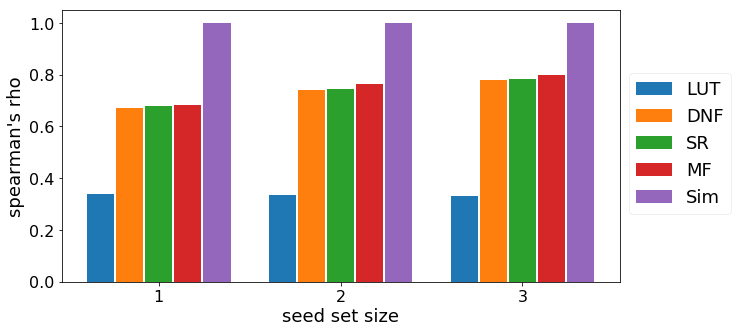

In [360]:
#plot average rankings (dynamical comparison)
num=3 #how many seed set sizes to compare
subnetworks=[n for n in rankings if rankings[n]['SR']]
print 'Comparing %d networks' % len(subnetworks)

averageSR=[np.mean([rankings[n]['SR'][i] for n in subnetworks]) for i in range(1,num+1)]
averagedtn=[np.mean([rankings[n]['DNF'][i] for n in subnetworks]) for i in range(1,num+1)]
averageltn=[np.mean([rankings[n]['LUT'][i] for n in subnetworks]) for i in range(1,num+1)]
averageMF=[np.mean([rankings[n]['MF'][i] for n in subnetworks]) for i in range(1,num+1)]
averageSim=[np.mean([rankings[n]['Sim'][i] for n in subnetworks]) for i in range(1,num+1)]
xvalues=[1,2,3]
width=0.15
plt.figure(figsize=(10,5))

plt.bar([x-2*width-.02 for x in xvalues],averageltn,label='LUT',width=width) #x-2*width-.02
plt.bar([x-width-.01 for x in xvalues],averagedtn,label='DNF',width=width)
plt.bar([x for x in xvalues],averageSR,label='SR',width=width) #x
plt.bar([x+width+.01 for x in xvalues],averageMF,label='MF',width=width) #x+width+.01
plt.bar([x+2*width+.02 for x in xvalues],averageSim,label='Sim',width=width) #x+2*width+.02
plt.xticks([1,2,3],[1,2,3],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("seed set size",fontsize=18)
plt.ylabel("spearman's rho",fontsize=18)
plt.legend(fontsize=18,framealpha=0.3,bbox_to_anchor=(1.0, 0.8))
#plt.figtext(0.797, 0.69, "*", wrap=True, horizontalalignment='left', fontsize=20)
#plt.figtext(0.837, 0.78, "*", wrap=True, horizontalalignment='left', fontsize=20)

Comparing 74 networks


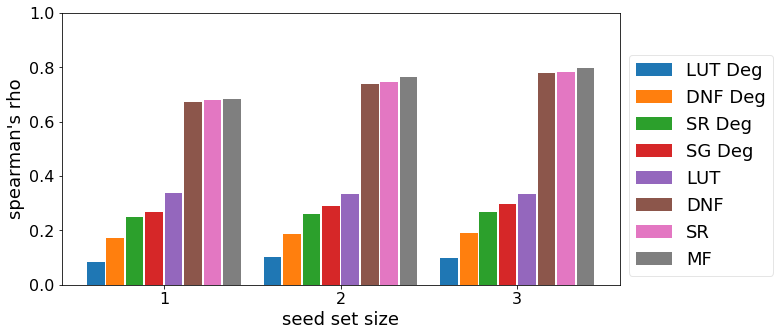

In [363]:
#plot average rankings (structural comparison)
num=3 #how many seed set sizes to compare
subnetworks=[n for n in rankings if cell_stats[n]['max_k']<15 and rankings[n]['SR TN out-degree']]
print 'Comparing %d networks' % len(subnetworks)

#plot spearman's rho between different methods
corrltn=[np.mean([rankings[n]['LUT'][i] for n in subnetworks]) for i in range(1,num+1)]
corrdtn=[np.mean([rankings[n]['DNF'][i] for n in subnetworks]) for i in range(1,num+1)]
corrtn=[np.mean([rankings[n]['SR'][i] for n in subnetworks]) for i in range(1,num+1)]
corrMF=[np.mean([rankings[n]['MF'][i] for n in subnetworks]) for i in range(1,num+1)]
corrSim=averageSim=[np.mean([rankings[n]['Sim'][i] for n in subnetworks]) for i in range(1,num+1)]
corrSG_deg=[np.mean([rankings[n]['out-degree'][i] for n in subnetworks]) for i in range(1,num+1)]
corrltn_deg=[np.mean([rankings[n]['LUT TN out-degree'][i] for n in subnetworks]) for i in range(1,num+1)]
corrdtn_deg=[np.mean([rankings[n]['DNF TN out-degree'][i] for n in subnetworks]) for i in range(1,num+1)]
corrTN_deg=[np.mean([rankings[n]['SR TN out-degree'][i] for n in subnetworks]) for i in range(1,num+1)]
xvalues=[1,2,3]
width=0.1
plt.figure(figsize=(10,5))

plt.bar([x-3.5*width-.035 for x in xvalues],corrltn_deg,label='LUT Deg',width=width)
plt.bar([x-2.5*width-.025 for x in xvalues],corrdtn_deg,label='DNF Deg',width=width)
plt.bar([x-1.5*width-.015 for x in xvalues],corrTN_deg,label='SR Deg',width=width)
plt.bar([x-0.5*width-.005 for x in xvalues],corrSG_deg,label='SG Deg',width=width)
plt.bar([x+0.5*width+.005 for x in xvalues],corrltn,label='LUT',width=width)
plt.bar([x+1.5*width+.015 for x in xvalues],corrdtn,label='DNF',width=width)
plt.bar([x+2.5*width+.025 for x in xvalues],corrtn,label='SR',width=width) #label='DNF-SR'
plt.bar([x+3.5*width+.035 for x in xvalues],corrMF,label='MF',width=width)
plt.xticks([1,2,3],[1,2,3],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("seed set size",fontsize=18)
plt.ylabel("spearman's rho",fontsize=18)
plt.ylim([0.0,1.0])
plt.legend(fontsize=18,framealpha=0.5,bbox_to_anchor=(1.0, 0.88))

#plt.bar([x-1.5*width-.02 for x in xvalues],averageltn,label='LUT',width=width) #x-2*width-.02
#plt.bar([x-width-.01 for x in xvalues],averagedtn,label='DNF',width=width)
#plt.bar([x-.5*width-.01 for x in xvalues],averageSR,label='SR',width=width) #x
#plt.bar([x+.5*width+.01 for x in xvalues],averageMF,label='MF',width=width) #x+width+.01
#plt.bar([x+1.5*width+.02 for x in xvalues],averageSim,label='Sim',width=width) #x+2*width+.02

74

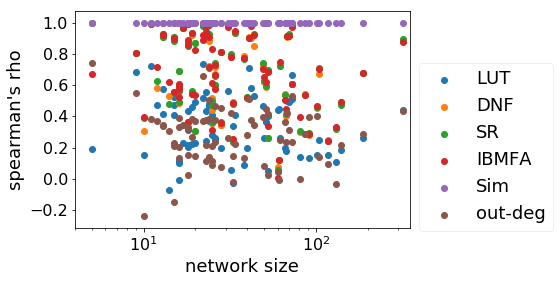

In [427]:
#scatter plots of rankings
from scipy.stats import pearsonr
num=1 #seed size to scatter
yvaluesSG=[rankings[n]['out-degree'][num] for n in subnetworks] #out-degree
yvaluesSR=[rankings[n]['SR'][num] for n in subnetworks]
yvaluesltn=[rankings[n]['LUT'][num] for n in subnetworks]
yvaluesdtn=[rankings[n]['DNF'][num] for n in subnetworks]
yvaluesMF=[rankings[n]['MF'][num] for n in subnetworks]
yvaluesSim=[rankings[n]['Sim'][num] for n in subnetworks]
xvalues=[cell_stats[n]['size'] for n in subnetworks]
print len(xvalues),#pearsonr(xvalues,yvaluesSG)

plt.scatter(xvalues,yvaluesltn,label='LUT')
plt.scatter(xvalues,yvaluesdtn,label='DNF')
plt.scatter(xvalues,yvaluesSR,label='SR')
plt.scatter(xvalues,yvaluesMF,label='IBMFA')
plt.scatter(xvalues,yvaluesSim,label='Sim')
plt.scatter(xvalues,yvaluesSG,label='out-deg')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("network size",fontsize=18)
plt.ylabel("spearman's rho",fontsize=18)
#plt.yscale('log',basey=10)
plt.xscale('log',basex=10)
#plt.ylim([.0001,3500])
plt.xlim([4,350])
#plt.legend(fontsize=12)
plt.legend(fontsize=18,framealpha=0.3,bbox_to_anchor=(1.0, 0.8))

74 (-0.3944253848903524, 0.0005064448614446473)


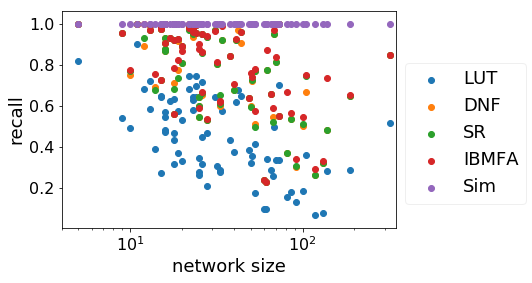

In [463]:
#scatter plots of stats
from scipy.stats import pearsonr
stat='recall'
num=3 #seed size to scatter
yvaluesSR=[stats[n]['SR TN'][stat][num] for n in subnetworks]
yvaluesltn=[stats[n]['LUT TN'][stat][num] for n in subnetworks]
yvaluesdtn=[stats[n]['DNF TN'][stat][num] for n in subnetworks]
yvaluesMF=[stats[n]['MF'][stat][num] for n in subnetworks]
yvaluesSim=[stats[n]['ground-truth'][stat][num] for n in subnetworks]
xvalues=[cell_stats[n]['size'] for n in subnetworks]
print len(xvalues),pearsonr(xvalues,yvaluesMF)

plt.scatter(xvalues,yvaluesltn,label='LUT')
plt.scatter(xvalues,yvaluesdtn,label='DNF')
plt.scatter(xvalues,yvaluesSR,label='SR')
plt.scatter(xvalues,yvaluesMF,label='IBMFA')
plt.scatter(xvalues,yvaluesSim,label='Sim')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("network size",fontsize=18)
plt.ylabel(stat,fontsize=18)
#plt.yscale('log',basey=10)
plt.xscale('log',basex=10)
#plt.ylim([-.05,1.05]) #except for size
plt.xlim([4,350])
#plt.legend(fontsize=12)
plt.legend(fontsize=18,framealpha=0.3,bbox_to_anchor=(1.0, 0.8))

In [93]:
#compare GTN sizes to theoretical maximum nodes and edges
with open('CANA/cell_collective_LUT_sizes.txt') as fp: #max nodes - 2n
    lut_sizes=eval(fp.read())
lut_sizes['Body Segmentation in Drosophila 2013']=80
with open('CANA/cell_collective_max_edges.txt') as fp: #max edges
    max_edges=eval(fp.read())
len(max_edges),len(lut_sizes)

(75, 75)

In [105]:
#compare GTN sizes
import pickle
total=0
#num=3
gtn_nodes={}
gtn_edges={}
dir_names=['CANA/DNF GTN/','CANA/SR GTN/','CANA/LUT GTN/','CANA/DNF PI GTN/'] #'CANA/constants_bf-sim/',
for index,n in enumerate(sorted(cell_stats,key=lambda x: cell_stats[x]['size'])[:]):
    if cell_stats[n]['max_k']>14: continue
    #if cell_stats[n]['size']!=14: continue #add to evaluate simulations
    #if n!='Budding Yeast Cell Cycle': continue #add to evaulate individual network
    #read in data
    name=n.replace(" ","_").replace(":","")
    dtn=pickle.load(open(dir_names[0]+name))
    tn=pickle.load(open(dir_names[1]+name))
    ltn=pickle.load(open(dir_names[2]+name))
    #ptn=pickle.load(open(dir_names[3]+name)) #add to evaluate DNF PI GTN
    max_nodes=lut_sizes[n]+cell_stats[n]['size']*2
    if len(ltn)!=max_nodes: print 'LUT GTN does not match correct number of nodes:',n
    if len(ltn.edges())!=max_edges[n]: print 'LUT GTN does not match correct number of edges:',n
    #print n,cell_stats[n]['size'],len(tn),len(dtn),len(ltn),max_nodes
    #print n,cell_stats[n]['edges'],len(tn.edges()),len(dtn.edges()),len(ltn.edges()),max_edges[n]
    gtn_nodes[n]={'SG':cell_stats[n]['size'],'DNF':len(dtn),'SR':len(tn),'LUT':len(ltn)}
    gtn_edges[n]={'SG':cell_stats[n]['edges'],'DNF':len(dtn.edges()),'SR':len(tn.edges()),'LUT':len(ltn.edges())}
    #gtn_nodes[n]['DNF PI']=len(ptn) #add to evaluate DNF PI GTN
    #gtn_edges[n]['DNF PI']=len(ptn.edges())

len(gtn_nodes),len(gtn_edges)

(74, 74)

In [405]:
#check network with high dtn size; notice that for EBGR & ErbB Signaling dtn is actually higher
for n in gtn_nodes:
    if gtn_nodes[n]['DNF']/float(gtn_nodes[n]['SG']) > 100 or gtn_nodes[n]['LUT']/float(gtn_nodes[n]['SG']) > 100:
        print n,gtn_nodes[n]['SG'],gtn_nodes[n]['DNF'],gtn_nodes[n]['LUT'],gtn_nodes[n]['DNF']/float(gtn_nodes[n]['SG'])

CD4+ T Cell Differentiation and Plasticity 18 580 2416 32.2222222222
Signal Transduction in Fibroblasts 139 14360 21054 103.309352518
EGFR & ErbB Signaling 104 28613 28164 275.125


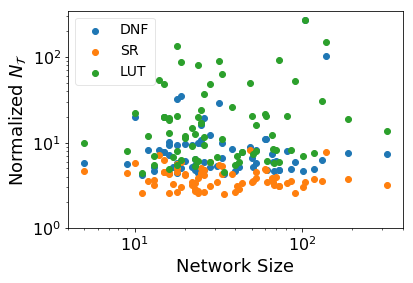

In [168]:
#plot size comparisons for nodes/edges
xvalues=[gtn_nodes[n]['SG'] for n in gtn_nodes]
y1values=[gtn_nodes[n]['DNF']/float(gtn_nodes[n]['SG']) for n in gtn_nodes] #/float(gtn_nodes[n]['SG'])
y2values=[gtn_nodes[n]['SR']/float(gtn_nodes[n]['SG']) for n in gtn_nodes]
y3values=[gtn_nodes[n]['LUT']/float(gtn_nodes[n]['SG']) for n in gtn_nodes]
#y4values=[gtn_nodes[n]['DNF PI']/float(gtn_nodes[n]['SG']) for n in gtn_nodes] #add to evaluate DNF PI GTN
#print xvalues[:10],y1values[:10],y2values[:10],y3values[:10]

plt.scatter(xvalues,y1values,label='DNF')
plt.scatter(xvalues,y2values,label='SR')
plt.scatter(xvalues,y3values,label='LUT')
#plt.scatter(xvalues,y4values,label='DNF PI') #add to evaluate DNF PI GTN
#plt.plot(xvalues,xvalues,'--',color='grey')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Network Size",fontsize=18) #"Network Size"
#plt.ylabel("Normalized GTN Size",fontsize=18)
plt.ylabel(r'Normalized $N_{\mathcal{T}}$',fontsize=18)
plt.yscale('log',basey=10)
plt.xscale('log',basex=10)
plt.ylim([1,350])
plt.xlim([4,400])
plt.legend(fontsize=14,framealpha=0.5)

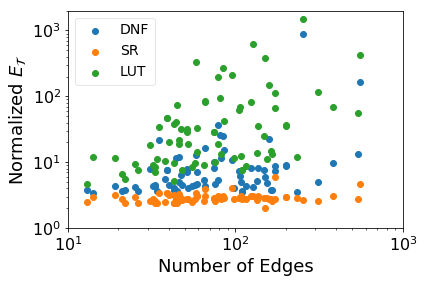

In [165]:
xvalues=[gtn_edges[n]['SG'] for n in gtn_edges]
y1values=[gtn_edges[n]['DNF']/float(gtn_edges[n]['SG']) for n in gtn_edges] #/float(gtn_edges[n]['SG'])
y2values=[gtn_edges[n]['SR']/float(gtn_edges[n]['SG']) for n in gtn_edges]
y3values=[gtn_edges[n]['LUT']/float(gtn_edges[n]['SG']) for n in gtn_edges]
#y4values=[gtn_edges[n]['DNF PI']/float(gtn_edges[n]['SG']) for n in gtn_edges] #add to evaluate DNF PI GTN
#print xvalues[:10],y1values[:10],y2values[:10],y3values[:10]

plt.scatter(xvalues,y1values,label='DNF')
plt.scatter(xvalues,y2values,label='SR')
plt.scatter(xvalues,y3values,label='LUT')
#plt.scatter(xvalues,y4values,label='DNF PI') #add to evaluate DNF PI GTN
#plt.plot(xvalues,xvalues,'--',color='grey')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of Edges",fontsize=18)
#plt.ylabel("Norm. GTN Num. Edges",fontsize=18)
plt.ylabel(r'Normalized $E_{\mathcal{T}}$',fontsize=18)
plt.yscale('log',basey=10)
plt.xscale('log',basex=10)
plt.ylim([1,2000])
plt.xlim([10,1000])
plt.legend(fontsize=14,framealpha=0.5)

In [169]:
for index,n in enumerate(sorted(cell_stats,key=lambda x: cell_stats[x]['size'])[:]):
    print n,cell_stats[n]['avg_k'],cell_stats[n]['max_k'],cell_stats[n]['size']

Cortical Area Development 2.8 4 5
Cell Cycle Transcription by Coupled CDK and Network Oscillators 2.11111111111 4 9
Mammalian Cell Cycle 2006 3.5 6 10
Toll Pathway of Drosophila Signaling Pathway 1.18181818182 2 11
Metabolic Interactions in the Gut Microbiome 2.58333333333 5 12
Lac Operon 1.92307692308 4 13
Regulation of the L-arabinose operon of Escherichia coli 1.61538461538 3 13
Arabidopsis thaliana Cell Cycle 4.71428571429 8 14
Predicting Variabilities in Cardiac Gene 2.6 7 15
Cardiac development 2.6 7 15
Fanconi anemia and checkpoint recovery 4.4 8 15
Neurotransmitter Signaling Pathway 1.375 3 16
BT474 Breast Cell Line Short-term ErbB Network 3.1875 6 16
HCC1954 Breast Cell Line Short-term ErbB Network 3.1875 6 16
SKBR3 Breast Cell Line Short-term ErbB Network 2.875 5 16
Body Segmentation in Drosophila 2013 1.88235294118 4 17
CD4+ T Cell Differentiation and Plasticity 4.66666666667 10 18
T-LGL Survival Network 2011 Reduced Network 2.38888888889 4 18
Budding Yeast Cell Cycle 2009 3

In [499]:
#check similarity between different methods, as based on influence set size
total=0
num=3
dir_names=['CANA/modules_sr_new/','CANA/modules_ltn/','CANA/constants_mf/','CANA/constants_bf-sim/'] #'CANA/constants_bf-sim/',
dir_names.extend(['CANA/modules_dtn/']) #add to evaluate DNF method
dir_names.extend(['CANA/modules_dtn_pi/']) #add to evaluate DNF PI method
sim={}
for index,n in enumerate(sorted(cell_stats,key=lambda x: cell_stats[x]['size'])[:]):
    if cell_stats[n]['max_k']>14: continue
    #if cell_stats[n]['size']!=14: continue #add to evaluate simulations
    #if n!='Budding Yeast Cell Cycle': continue #add to evaulate individual network
    #read in data
    with open(dir_names[0]+n+'.txt') as fp:
        constants_sr=eval(fp.read())
    with open(dir_names[1]+n+'.txt') as fp:
        constants_ltn=eval(fp.read())
    with open(dir_names[2]+n+'.txt') as fp:
        constants_mf=eval(fp.read())
    with open(dir_names[3]+n+'.txt') as fp:
        constants_sim=eval(fp.read())
    try:
        with open(dir_names[4]+n+'.txt') as fp:
            constants_dtn=eval(fp.read())
        with open(dir_names[5]+n+'.txt') as fp: #add to evaluate DNF PI method
            constants_pi=eval(fp.read())
    except: continue

    #get similarity
    keys,constants=['SR TN','LUT TN','MF','ground-truth','DNF TN'],[constants_sr,constants_ltn,constants_mf,constants_sim,constants_dtn]
    keys.extend(['DNF PI TN']) #add to evaluate DNF PI method
    constants.extend([constants_pi])
    sim[n]={key:{} for key in keys}
    for key in keys: sim[n][key]={k:{} for k in keys}
    print n,[len(c) for c in constants] #keys,

    for k in range(1,num+1):
        seeds={seed for seed in constants_sr if len(seed)==k}
        #seeds={seed for seed in constants_dtn if len(seed)==k}
        for i,d1 in enumerate(constants):
            for j,d2 in enumerate(constants):
                #print "comparing {} with {}".format(keys[i],keys[j])
                sim[n][keys[i]][keys[j]][k]=0.0
                #count=0
                for seed in seeds: #all dicts should have the same keys across methods
                    set1,set2=d1[seed],d2[seed] #compare to ground truth
                    #count+=1
                    sim[n][keys[i]][keys[j]][k]+=compute_jaccard(set1,set2)
                    #print seed, compute_jaccard(set1,set2)
                    #print set1,set2
                sim[n][keys[i]][keys[j]][k]/=len(seeds)
                #print sim[n][keys[i]][keys[j]]

    #print n,sim[n]
    total+=1
    #break
total

Cortical Area Development [130, 130, 130, 130, 130, 130]
Cell Cycle Transcription by Coupled CDK and Network Oscillators [834, 834, 834, 834, 834, 834]
Mammalian Cell Cycle 2006 [1160, 1160, 1160, 1160, 1160, 1160]
Toll Pathway of Drosophila Signaling Pathway [1242, 1242, 1242, 1242, 1242, 1242]
Metabolic Interactions in the Gut Microbiome [1288, 1288, 1288, 1288, 1288, 1288]
Lac Operon [1338, 1338, 1338, 1338, 1338, 1338]
Regulation of the L-arabinose operon of Escherichia coli [1338, 1338, 1338, 1338, 1338, 1338]
Arabidopsis thaliana Cell Cycle [1392, 1392, 1392, 1392, 1392, 1392]
Predicting Variabilities in Cardiac Gene [1450, 1450, 1450, 1450, 1450, 1450]
Cardiac development [1450, 1450, 1450, 1450, 1450, 1450]
Fanconi anemia and checkpoint recovery [1450, 1450, 1450, 1450, 1450, 1450]
Neurotransmitter Signaling Pathway [1512, 1512, 1512, 1512, 1512, 1512]
BT474 Breast Cell Line Short-term ErbB Network [1512, 1512, 1512, 1512, 1512, 1512]
HCC1954 Breast Cell Line Short-term ErbB Ne

74

In [505]:
sim[n].keys(),len(sim)
#with open('CANA/cell_collective_similarities.txt','w') as fp:
#    fp.write(str(sim))
#with open('CANA/cell_collective_similarities_PIs.txt','w') as fp:
#    fp.write(str(sim))
#with open('CANA/gtn_nodes.txt','w') as fp:
#    fp.write(str(gtn_nodes))
#with open('CANA/gtn_edges.txt','w') as fp:
#    fp.write(str(gtn_edges))

#for n in sorted(cell_stats,key=lambda x:cell_stats[x]['avg_bias']): print n,cell_stats[n]['avg_bias']

(['MF', 'ground-truth', 'LUT TN', 'SR TN', 'DNF TN', 'DNF PI TN'], 74)

Comparing 74 networks


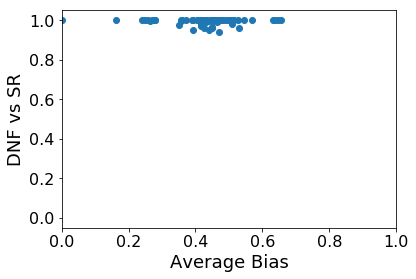

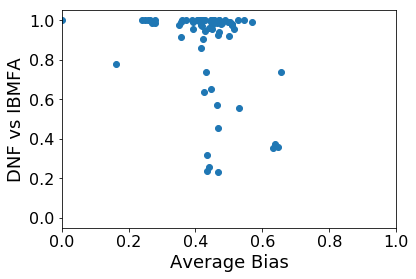

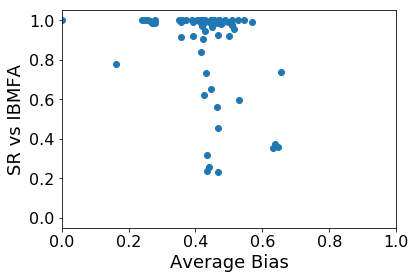

In [418]:
#visualize stats as A v B plots; is there a dependence on size/bias of the network for similarity?
num=1 #which seed set size to compare
subnetworks=[n for n in stats if stat in stats[n]['SR TN']] #N=[10,13]
print 'Comparing %d networks' % len(subnetworks)#,[n for n in subnetworks]

xvalues=[cell_stats[n]['size'] for n in subnetworks]
xvalues=[cell_stats[n]['avg_bias'] for n in subnetworks]
y1values=[sim[n]['DNF TN']['SR TN'][num] for n in subnetworks]
y2values=[sim[n]['DNF TN']['MF'][num] for n in subnetworks]
y3values=[sim[n]['SR TN']['MF'][num] for n in subnetworks]
#print xvalues[:10],y1values[:10],y2values[:10],y3values[:10]
labels=['DNF vs SR','DNF vs IBMFA','SR vs IBMFA']
yvalues=[y1values,y2values,y3values]

for i in range(3):
    plt.scatter(xvalues,yvalues[i])
    plt.xlabel('Average Bias',fontsize=18) #'Network Size', 'Average Bias'
    plt.ylabel(labels[i],fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    #plt.yscale('log',basey=10)
    #plt.xscale('log',basex=10)
    plt.ylim([-.05,1.05])
    #plt.xlim([4,350]) #network size
    plt.xlim([0,1]) #bias
    plt.show()

#plt.legend(fontsize=14,framealpha=0.5)

(4, 350)

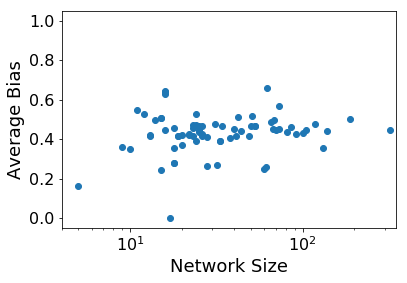

In [419]:
#how is bias distributed across the cell collective?
xvalues=[cell_stats[n]['size'] for n in subnetworks]
yvalues=[cell_stats[n]['avg_bias'] for n in subnetworks]
plt.scatter(xvalues,yvalues)
plt.xlabel('Network Size',fontsize=18) #'Network Size', 'Average Bias'
plt.ylabel('Average Bias',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.yscale('log',basey=10)
plt.xscale('log',basex=10)
plt.ylim([-.05,1.05])
plt.xlim([4,350]) #network size

Comparing 74 networks


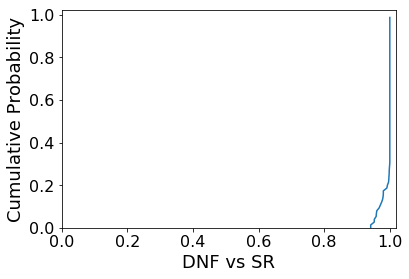

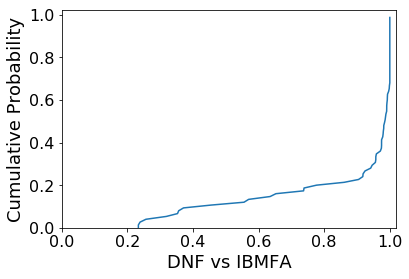

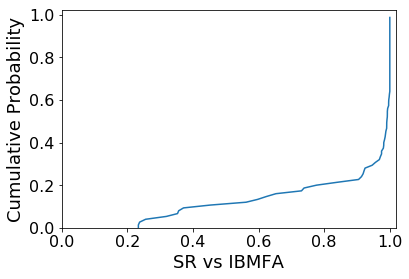

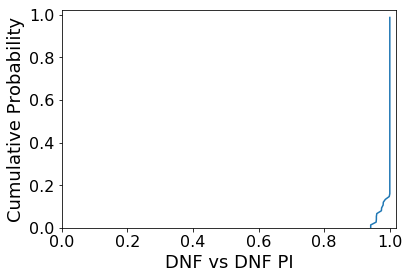

In [507]:
#plot cdf of similarity for each A v B pair
num=1 #which seed set size to compare
subnetworks=[n for n in sim] #N=[10,13]
print 'Comparing %d networks' % len(subnetworks)#,[n for n in subnetworks]

xvalues=[cell_stats[n]['size'] for n in subnetworks]
y1values,y2values,y3values,y4values=[0],[0],[0],[0]
y1values.extend([sim[n]['DNF TN']['SR TN'][num] for n in subnetworks])
y2values.extend([sim[n]['DNF TN']['MF'][num] for n in subnetworks])
y3values.extend([sim[n]['SR TN']['MF'][num] for n in subnetworks])
y4values.extend([sim[n]['DNF TN']['DNF PI TN'][num] for n in subnetworks]) #add to evaluate DNF PI method
y1values,y2values,y3values=sorted(y1values),sorted(y2values),sorted(y3values)
y4values=sorted(y4values) #add to evaluate DNF PI method
y1values[0],y2values[0],y3values[0]=y1values[1],y2values[1],y3values[1] #add connection to x-axis line
y4values[0] = y4values[1] #add to evaluate DNF PI method
#print xvalues[:10],y1values[:10],y2values[:10],y3values[:10]
labels=['DNF vs SR','DNF vs IBMFA','SR vs IBMFA','DNF vs DNF PI']
yvalues=[sorted(y1values),sorted(y2values),sorted(y3values),sorted(y4values)]
#print yvalues,[len(y) for y in yvalues]

for k in range(4):
    plt.plot(yvalues[k],[float(i)/len(yvalues[k]) for i in range(len(yvalues[k]))])
    plt.xlabel(labels[k],fontsize=18)
    plt.ylabel("Cumulative Probability",fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim([0,1.02])
    plt.ylim([0,1.02])
    plt.show()

#sorted_networks=sorted(cell_stats,key=lambda x: float(cell_drivers[x]['size'])/cell_stats[x]['size'])
#dvalues=[float(cell_drivers[n]['size'])/cell_stats[n]['size'] for n in sorted_networks]
#yvalues=[float(i+1)/len(dvalues) for i in range(len(dvalues))]
#plt.plot(dvalues,yvalues)
#plt.ylabel("Cumulative Probability",fontsize=20,labelpad=10)
#plt.xlabel('Relative Size',fontsize=20,labelpad=10)

Comparing 74 networks
y1values y2values DNF SR


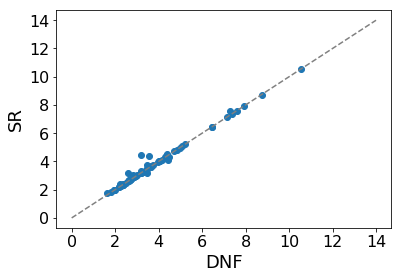

y1values y3values DNF IBMFA


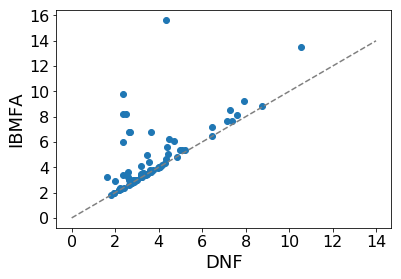

y2values y3values SR IBMFA


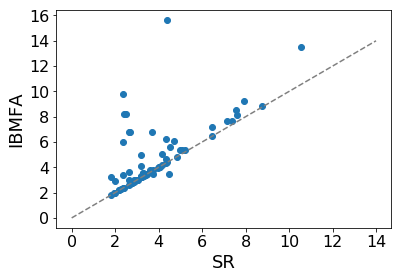

In [298]:
#visualize stats as A v B plots
num=1 #which seed set size to compare
stat='size'
subnetworks=[n for n in stats if stat in stats[n]['SR TN']] #N=[10,14]
print 'Comparing %d networks' % len(subnetworks)#,[n for n in subnetworks]

y1values=[stats[n]['DNF TN'][stat][num] for n in subnetworks]
y2values=[stats[n]['SR TN'][stat][num] for n in subnetworks]
y3values=[stats[n]['MF'][stat][num] for n in subnetworks]
#print xvalues[:10],y1values[:10],y2values[:10],y3values[:10]
labels=['DNF','SR','IBMFA']
yvalues=[y1values,y2values,y3values]

for i in range(3):
    j,k=i/2+1,(i+1)/2+2
    print 'y'+str(j)+'values','y'+str(k)+'values',labels[j-1],labels[k-1]
    plt.scatter(eval('y'+str(j)+'values'),eval('y'+str(k)+'values'))
    plt.xlabel(labels[j-1],fontsize=18)
    plt.ylabel(labels[k-1],fontsize=18)
    plt.plot([x for x in range(15)],[x for x in range(15)],'--',color='grey')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

In [527]:
#determine average values for similarity
num=3
discards=['Yeast Apoptosis','Arabidopsis thaliana Cell Cycle','Stomatal Opening Model'] #discard if comparing DNF vs DNF PI
subnetworks=[n for n in sim]# if stat in stats[n]['SR TN']]
subnetworks=[n for n in sim if n not in discards]
print len(subnetworks),sim[n].keys()
keys=['LUT TN','DNF TN','SR TN','MF','ground-truth']
keys=['DNF TN','DNF PI TN']
#keys.extend(['DNF PI TN']) #add to evaluate DNF PI method
for i,key1 in enumerate(keys):
    for j,key2 in enumerate(keys):
        print key1,key2
        #print np.mean([sim[n][key1][key2][num] for n in subnetworks]) #by seed set size
        print np.mean([sim[n][key1][key2][k+1] for k in range(num) for n in subnetworks]) #total average

71 ['MF', 'ground-truth', 'LUT TN', 'SR TN', 'DNF TN', 'DNF PI TN']
DNF TN DNF TN
1.0
DNF TN DNF PI TN
0.9945388422010353
DNF PI TN DNF TN
0.9945388422010353
DNF PI TN DNF PI TN
1.0


Comparing 74 networks
y1values y2values DNF SR


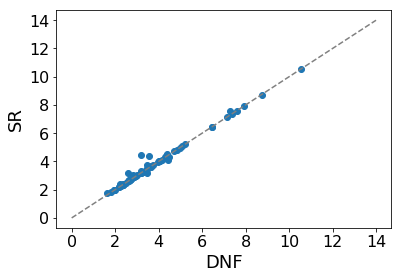

y1values y3values DNF IBMFA


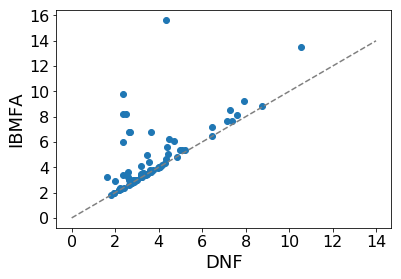

y2values y3values SR IBMFA


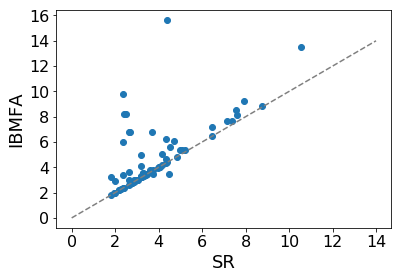

y2values y4values SR DNF PI


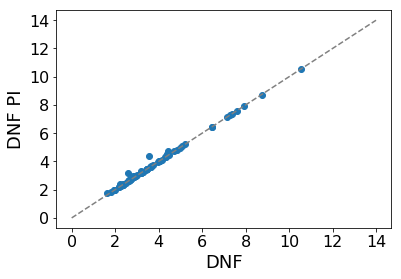

In [575]:
#visualize stats as A v B plots for DNF vs DNF PI
num=1 #which seed set size to compare
stat='size'
subnetworks=[n for n in stats if stat in stats[n]['SR TN']]
print 'Comparing %d networks' % len(subnetworks)#,[n for n in subnetworks]

y1values=[stats[n]['DNF TN'][stat][num] for n in subnetworks]
y2values=[stats[n]['SR TN'][stat][num] for n in subnetworks]
y3values=[stats[n]['MF'][stat][num] for n in subnetworks]
y4values=[stats[n]['DNF PI TN'][stat][num] for n in subnetworks]
#print y4values
#print xvalues[:10],y1values[:10],y2values[:10],y3values[:10]
labels=['DNF','SR','IBMFA','DNF PI']
yvalues=[y1values,y2values,y3values,y4values]

for i in range(4):
    j,k=i/2+1,(i+1)/2+2
    print 'y'+str(j)+'values','y'+str(k)+'values',labels[j-1],labels[k-1]
    if i==3: 
        plt.scatter(y1values,y4values) #add to evaluate DNF PI method
        plt.xlabel('DNF',fontsize=18)
        plt.ylabel('DNF PI',fontsize=18)
    else: 
        plt.scatter(eval('y'+str(j)+'values'),eval('y'+str(k)+'values'))
        plt.xlabel(labels[j-1],fontsize=18)
        plt.ylabel(labels[k-1],fontsize=18)
    plt.plot([x for x in range(15)],[x for x in range(15)],'--',color='grey')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

Comparing 71 networks
71


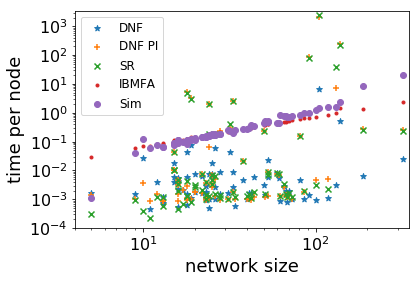

In [605]:
#compare PI DNF times to regular DNF and SR
with open('CANA/cell_collective_times_PIs.txt') as fp:
    times=eval(fp.read())

#scatter plot of times
num=1 #which seed set size to compare; note: normalization below does not work with seed sizes other than num=1
discards=['Yeast Apoptosis','Arabidopsis thaliana Cell Cycle','Stomatal Opening Model'] #discard if comparing DNF vs DNF PI
subnetworks=[n for n in times if times[n] and 'DNF PI' in times[n] and num in times[n]['DNF PI'] and n not in discards]
print 'Comparing %d networks' % len(subnetworks)

yvaluesSR=[times[n]['SR'][num]+times[n]['SR TN']/(cell_stats[n]['size']*2) for n in subnetworks] #with DCM TN, normalized per node
yvaluesltn=[times[n]['LUT'][num]+times[n]['LUT TN']/(cell_stats[n]['size']*2) for n in subnetworks] #with LUT TN, normalized per node
yvaluesdtn=[times[n]['DNF'][num]+times[n]['DNF TN']/(cell_stats[n]['size']*2) for n in subnetworks] #with DNF TN, normalized per node
yvaluesPI=[times[n]['DNF PI'][num]+times[n]['DNF PI TN']/(cell_stats[n]['size']*2) for n in subnetworks] #with DNF PI TN, normalized per node
yvaluesMF=[times[n]['MF'][num] for n in subnetworks]
yvaluesSim=[times[n]['BF'][num] if 'BF' in times[n] else times[n]['Sim'][num] for n in subnetworks]
xvalues=[cell_stats[n]['size'] for n in subnetworks]
print len(xvalues)

#plt.scatter(xvalues,yvaluesltn,label='LUT')
plt.scatter(xvalues,yvaluesdtn,marker='*',label='DNF')
plt.scatter(xvalues,yvaluesPI,marker='+',label='DNF PI')
plt.scatter(xvalues,yvaluesSR,marker='x',label='SR')
plt.scatter(xvalues,yvaluesMF,marker='.',label='IBMFA')
plt.scatter(xvalues,yvaluesSim,marker='o',label='Sim')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("network size",fontsize=18)
plt.ylabel("time per node",fontsize=18)
plt.yscale('log',basey=10)
plt.xscale('log',basex=10)
plt.ylim([.0001,3500])
plt.xlim([4,350])
plt.legend(fontsize=12)

Comparing 71 networks
0.10753532200066673 34.64923993683531 39.91517125297884


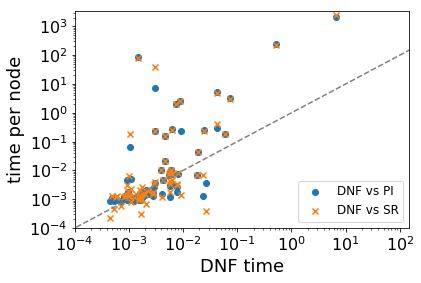

In [606]:
#compare DNF PI and SR times relative to DNF; depends on above cell
print 'Comparing %d networks' % len(subnetworks)
plt.scatter(yvaluesdtn,yvaluesPI,label='DNF vs PI') #marker='*',
plt.scatter(yvaluesdtn,yvaluesSR,marker='x',label='DNF vs SR')
#plt.scatter(yvaluesdtn,yvaluesMF,marker='.',label='DNF vs IBMFA')
#plt.scatter(yvaluesdtn,yvaluesSim,marker='o',label='DNF vs Sim')
plt.plot([x for x in range(1500)],[x for x in range(1500)],'--',color='grey')
#print sorted(yvaluesSR)
print np.mean(yvaluesdtn),np.mean(yvaluesPI),np.mean(yvaluesSR)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("DNF time",fontsize=18)
plt.ylabel("time per node",fontsize=18)
plt.yscale('log',basey=10)
plt.xscale('log',basex=10)
plt.ylim([.0001,3500])
plt.xlim([.0001,150])
plt.legend(fontsize=12)

Comparing 74 networks ([3.7680590449891627, 7.044163420742874, 9.929129987129988], [3.817435337216043, 7.123420020281138, 10.027660955598455], [3.8030021310044058, 7.105663461036963, 10.003888996138997])


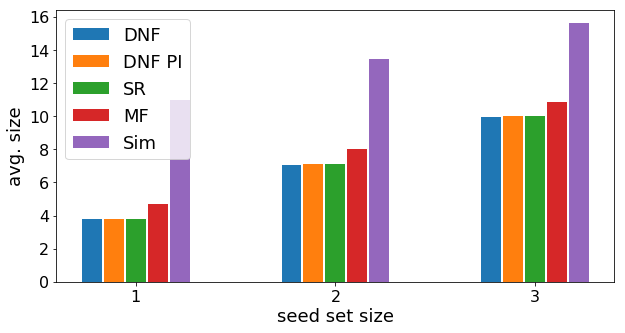

In [576]:
#plot average size, similarity, recall, or precision for DNF PI method vs regular DNF and SR methods
num=3 #how many seed set sizes to compare
stat='size'
subnetworks=[n for n in stats if 'DNF PI TN' in stats[n]]# and cell_stats[n]['size']>9 and cell_stats[n]['size']<15] #N=[10,13]
print 'Comparing %d networks' % len(subnetworks),#[n for n in subnetworks]

#plot average module lengths
averageSR=[np.mean([stats[n]['SR TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
averagedtn=[np.mean([stats[n]['DNF TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
averagePI=[np.mean([stats[n]['DNF PI TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
averageltn=[np.mean([stats[n]['LUT TN'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
averageMF=[np.mean([stats[n]['MF'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
averageSim=[np.mean([stats[n]['ground-truth'][stat][i] for n in subnetworks]) for i in range(1,num+1)]
xvalues=[1,2,3]
width=0.1
plt.figure(figsize=(10,5))
print(averagedtn,averageSR,averagePI)

#plt.bar([x-2.0*width-.02 for x in xvalues],averageltn,label='LUT',width=width)
plt.bar([x-2.0*width-.02 for x in xvalues],averagedtn,label='DNF',width=width) #x-2*width-.02
plt.bar([x-1.0*width-.01 for x in xvalues],averagePI,label='DNF PI',width=width)
plt.bar([x for x in xvalues],averageSR,label='SR',width=width) #x
plt.bar([x+1.0*width+.01 for x in xvalues],averageMF,label='MF',width=width) #x+width+.01
plt.bar([x+2.0*width+.02 for x in xvalues],averageSim,label='Sim',width=width) #x+2*width+.02
plt.xticks([1,2,3],[1,2,3],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("seed set size",fontsize=18)
plt.ylabel("avg. "+stat,fontsize=18)
#plt.ylim([0,7])
plt.legend(fontsize=18)#,framealpha=0.3,bbox_to_anchor=(1.0, 0.8))

#### Other Influence Measures

In [608]:
## Compare perturbation and configuration influence for drosophila
configuration_influence_mf={1:[0.9411764705882353, 0.7987564440155484, 0.7716340532873592, 0.7197154854823246, 0.6825037717091474, 0.680987312822891, 0.6845207768530017, 0.6836477952072739, 0.6871365250048267, 0.6835702474912125, 0.6810278721313227, 0.6781638581067861, 0.6778145393776276, 0.6781652482564356, 0.6789637666782481, 0.6790912549068554],
                        2:[0.8823529411764708, 0.7158040188814826, 0.6679792094232824, 0.6081303783106551, 0.5666221113002504, 0.5532569511477796, 0.5468809939044732, 0.5411651287153485, 0.5391596576677451, 0.5352737859329373, 0.5329467611030771, 0.5309537089607477, 0.5305430623045756, 0.5305034192101611, 0.5307328931957334, 0.530590432805213],
                           3:[0.8235294117647058, 0.6366821963196203, 0.5735097391788644, 0.5106116780558548, 0.4690924162113671, 0.45077444654489285, 0.44040226429739693, 0.4330361103347771, 0.4290845452624598, 0.42544407212667407, 0.42330262786710043, 0.4217576719089416, 0.42126832062956465, 0.42105540056076035, 0.421028742993149, 0.4208245509454403]}
perturbation_influence_mf={1:[0.014705882352941176, 0.024708044982698952, 0.03230941666863782, 0.03887541400173054, 0.04457808427307313, 0.04901998858757813, 0.051629219312269, 0.053185078403639646, 0.05358232071846146, 0.05310477547687219, 0.05250784430616022, 0.052369213078416216, 0.05260031977107125, 0.05289593214129668, 0.053059618871044434, 0.053049996886271704],
                          2:[0.029411764705882255, 0.04862537846020755, 0.06235822591814605, 0.07369403508025309, 0.08319640826824695, 0.08957919408410277, 0.09318727562659476, 0.09535823797421343, 0.0957641316175079, 0.09530183982175265, 0.0947799688612229, 0.09479074457062144, 0.09510770136564169, 0.09541131526489587, 0.09554434806023, 0.0955165456192356],
                          3:[0.04411764705881902, 0.07171820934256028, 0.09015711517069984, 0.10466268775443403, 0.11636698847789956, 0.1229666292863766, 0.12643948758841705, 0.1284964118078774, 0.12858021006796658, 0.12821855680514524, 0.1278997408358037, 0.12808125931808195, 0.1284069584570613, 0.12863828195140797, 0.12869776222909837, 0.12865281756178704]}
inf_correlation_mf={1:['nan', -0.5546402832235161, -0.4738940930859074, -0.4536068308137995, -0.4689055434888012, -0.598439903294866, -0.6789049823166196, -0.7336701881907406, -0.7918933168475842, -0.739336527451802, -0.7343789480751889, -0.7185256200858859, -0.7355058934155714, -0.754321871970088, -0.7613587419986063, -0.7529450930514648],
                   2:['nan', -0.502723503997628, -0.4964667500891019, -0.49860958009433326, -0.5394901830337931, -0.6628485100470201, -0.7545882986039643, -0.7966073837752268, -0.8146084687366919, -0.8039107760221027, -0.7898319210786977, -0.7827954489117598, -0.7882027664089777, -0.7956471797460701, -0.8000703739087147, -0.7990330451165155],
                   3:['nan', -0.484597634757535, -0.4688623490467076, -0.47550491343571055, -0.515095026186789, -0.6260691041904946, -0.7124289493450122, -0.7599937282931819, -0.7848807589342517, -0.7793797165465158, -0.7669359489897799, -0.7580677650556357, -0.7587387529597228, -0.7640333509099783, -0.7686814812163464, -0.7697203159595281]}
configuration_influence_sim={1:[0.9344820855464061, 0.7958406603307469, 0.774682614444681, 0.7276805702127824, 0.7042002647571971, 0.7123581211775899, 0.7146173472464115, 0.7046996308262096, 0.7099757862599811, 0.7094068773044497, 0.7093565399910843, 0.7093565399910843, 0.7093565399910843, 0.7093565399910843, 0.7093565399910843, 0.7093565399910843],
                            2:[0.8759386489111558, 0.7098038708951665, 0.6690014658502252, 0.6181562430085246, 0.5931906984566365, 0.5900667905781414, 0.5891396967484096, 0.5824622727045821, 0.5836033794166011, 0.5828966305701951, 0.5827466177079456, 0.5827466177079456, 0.5827466177079456, 0.5827466177079456, 0.5827466177079456, 0.5827466177079456],
                            3:[0.8175401612629424, 0.6315187973130809, 0.5744828992313133, 0.5219977590479371, 0.4967725847220309, 0.4904296524301921, 0.486935376927953, 0.48299988060689214, 0.4829238616978671, 0.4825216985833308, 0.4824543977356026, 0.4824543977356026, 0.4824543977356026, 0.4824543977356026, 0.4824543977356026, 0.4824543977356026]}
perturbation_influence_sim={1:[0.018962763368189604, 0.02804493713832604, 0.03507188799321021, 0.03928786586638113, 0.04283044905028758, 0.04542237669766767, 0.04658625818140865, 0.047136486620071597, 0.047691718679225226, 0.04763823658273695, 0.04761782135782346, 0.04761782135782346, 0.04761782135782346, 0.04761782135782346, 0.04761782135782346, 0.04761782135782346],
                           2:[0.03366067481383136, 0.05130558783940964, 0.06411504003552645, 0.0717982865966883, 0.0778769735631459, 0.08209249360032746, 0.08372341696707078, 0.08521548548251441, 0.0861116831875995, 0.08607877504662388, 0.08607262349136072, 0.08607262349136072, 0.08607262349136072, 0.08607262349136072, 0.08607262349136072, 0.08607262349136072],
                           3:[0.04826516382011735, 0.07392514490515686, 0.0910367886055354, 0.10092065422165344, 0.10856512268133157, 0.11266358724801531, 0.11381269422607047, 0.11567660328293808, 0.11627931356608402, 0.11624087087507015, 0.11624017984942284, 0.11624017984942284, 0.11624017984942284, 0.11624017984942284, 0.11624017984942284, 0.11624017984942284]}
inf_correlation_sim={1:[-0.17372039724980898, -0.5388846447669977, -0.574025974025974, -0.4970206264323911, -0.5611917494270435, -0.5859434682964094, -0.6678380443086326, -0.6815889992360581, -0.6956455309396485, -0.6956455309396485, -0.6956455309396485, -0.6956455309396485, -0.6956455309396485, -0.6956455309396485, -0.6956455309396485, -0.6956455309396485],
                    2:[-0.14032325706054444, -0.5168474011717166, -0.5332614127226987, -0.556590498183866, -0.5776150134921951, -0.6172008115480235, -0.6657197053695015, -0.6932766316917138, -0.7072833236279896, -0.7058063643777304, -0.7056369285910064, -0.7056369285910064, -0.7056369285910064, -0.7056369285910064, -0.7056369285910064, -0.7056369285910064],
                    3:[-0.13864894187376375, -0.5047192266134656, -0.5092611823334836, -0.539266079569348, -0.5620099021121064, -0.5983955143632363, -0.6462123525374526, -0.6675844386821176, -0.6826909619925496, -0.6812400783307859, -0.6811526264859509, -0.6811526264859509, -0.6811526264859509, -0.6811526264859509, -0.6811526264859509, -0.6811526264859509]}

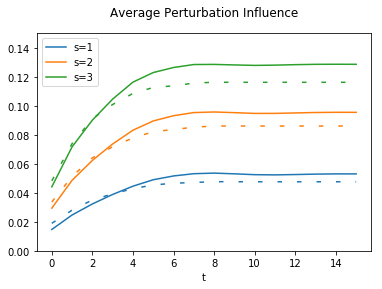

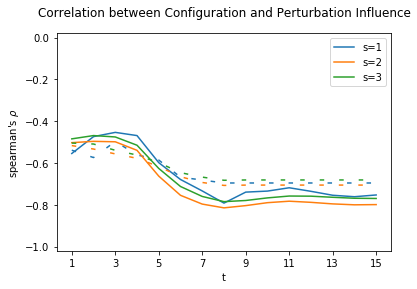

In [611]:
#plot for multiple seed sizes
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for s in perturbation_influence_mf:
    #print influences[s]
    plt.plot([t for t in range(len(perturbation_influence_mf[s]))],perturbation_influence_mf[s],label="s="+str(s))
    plt.plot([t for t in range(len(perturbation_influence_sim[s]))],perturbation_influence_sim[s],'--',dashes=(3, 10),color=colors[s-1],markersize=10)
    #plt.title("Average Influence over time",y=1.05)
    plt.title("Average Perturbation Influence",y=1.05)
    plt.legend(loc="upper left")
    plt.xlabel("t")
    plt.ylim([0,.15])
plt.show()
    
for s in inf_correlation_mf:
    #print correlations[s]
    plt.plot([t for t in range(1,len(inf_correlation_mf[s]))],inf_correlation_mf[s][1:],label="s="+str(s))
    plt.plot([t for t in range(1,len(inf_correlation_sim[s]))],inf_correlation_sim[s][1:],'--',dashes=(3, 10),color=colors[s-1],markersize=10)
    #plt.title("Correlation between Configuration Entropy and Influence",y=1.05)
    plt.title("Correlation between Configuration and Perturbation Influence",y=1.05)
    plt.legend()
    plt.ylim([-1.02,.02])
    plt.xticks([1,3,5,7,9,11,13,15])
    plt.ylabel(r"spearman's $\rho$")
    plt.xlabel("t")

In [632]:
#general influence measure to compare perturbation to baseline
def influence(diffusion,baseline,nodes=None,normalized=True,strict=False):
    """ determine the influence of an iterable keyed as {timestep: {node: activation_probabilities} }
    compared to a baseline iterable, restricted to nodes (default all), normalization based on size of network N 
    strict counts a distance of 1 if the node probabilities aren't equal (result is the number of mismatched nodes) """
    
    if not diffusion or not diffusion[0] or not baseline or not baseline[0]: #no diffusion to measure
        return 0.0
    if not nodes:
        nodes=diffusion[0].keys()
    if set(nodes)-set(diffusion[0].keys()) or set(nodes)-set(baseline[0].keys()): #bad nodes
        print "Diffusion incompatible with baseline - different nodes"
        return 0.0
    min_length=min([len(diffusion),len(baseline)]) #compare only times with both measures
    diffusion_influence={t:0.0 for t in range(min_length)}
    for t in range(min_length):
        for node in nodes:
            if strict and diffusion[t][node]!=baseline[t][node]: #count the difference
                diffusion_influence[t]+=1
            if not strict: #find actual distance
                diffusion_influence[t]+=(diffusion[t][node]-baseline[t][node])**2
        
    if normalized:
        return {t:diffusion_influence[t]/len(nodes) for t in diffusion_influence}
    return diffusion_influence       

#diffusion={0: {'a':1.0,'b':0.0}, 1: {'a':0.5,'b':0.3}, 2: {'a':0.4,'b':0.4}}
#baseline={0: {'a':1.0,'b':0.0}, 1: {'a':0.6,'b':0.2}, 2: {'a':0.4,'b':0.3}, 3: {'a':0.4,'b':0.4}}
#influence(diffusion,baseline,nodes={'a','b'},normalized=True,strict=False)

In [664]:
#check entropy calculations
from scipy.stats import entropy
#entropy function of possible configurations
def config_entropy(diffusion,nodes=None,base=2,binary=True,normalized=True,strict=False):
    """ determine the entropy of an iterable keyed as {timestep: {node: activation_probabilities} }
    to determine information gain from reducing possible network configurations, 
    normalization based on total possible entropy and total possible network configurations,
    strict only reduces configurations based on constants rather than probabilities """
    
    if not diffusion or not diffusion[0]: #no diffusion to measure
        return 0.0
    if not nodes:
        nodes=diffusion[0].keys()
    config_entropy={t:0.0 for t in diffusion}
    configs={t:1.0 for t in diffusion}
    #max possible entropy
    if binary:
        max_entropy=sum([entropy([.5,.5],base=base) for node in nodes])
        max_configs=2**len(nodes)
    #print max_entropy,"{:e}".format(max_configs)
    for t in diffusion:
        for node in nodes:
            config_entropy[t]+=entropy([diffusion[t][node],1-diffusion[t][node]],base=base)
            if strict and diffusion[t][node]<1 and diffusion[t][node]>0: #non-constant so consider both possibilities
                configs[t]*=2
            else:
                configs[t]*=1/max([diffusion[t][node],1-diffusion[t][node]])
        
    if normalized:
        return {t:config_entropy[t]/max_entropy for t in config_entropy},{t:configs[t]/max_configs for t in configs}
    return config_entropy,configs

In [665]:
#find all seed entropies over time
def seed_entropies(modules,seeds,nodes=None,base=2,binary=True,normalized=True,data=True,strict=False):
    """ determine the entropy of an iterable keyed as {timestep: {node: activation_probabilities} } for given nodes
    to determine information gain from reducing possible network configurations for all seeds from modules """
    
    seed_entropies,seed_configs={},{}
    for seed in seeds:
        ce=config_entropy(modules[seed],nodes=nodes,base=base,binary=binary,normalized=normalized,strict=strict)
        seed_entropies[seed],seed_configs[seed]=ce[0],ce[1]
        
    if data:
        #assume all seeds have the same number of iterations
        print("average entropy:",[np.mean([seed_entropies[seed][t] for seed in seed_entropies]) for t in seed_entropies[seed]])
        print("average configurations:",[np.mean([seed_configs[seed][t] for seed in seed_configs]) for t in seed_configs[seed]])
        
    return seed_entropies,seed_configs

In [752]:
#with open('CANA//dact_prob_sim-s3_T15.json') as fp:
#    dact_prob_sim=json.load(fp)
#with open('CANA//null_modules_bf-sim//Body Segmentation in Drosophila 2013.txt') as fp:
#    baseline=eval(fp.read())[()]
#with open('CANA//modules_bf-sim//Body Segmentation in Drosophila 2013.txt') as fp:
#    dact_prob_sim3=eval(fp.read())
#dact_prob_sim2={str(seed): {int(key): dact_prob_sim2[seed][key] for key in dact_prob_sim2[seed]} for seed in dact_prob_sim2}
#with open("CANA//drosophila_simulations_entropies_s1.json") as fp:
#    entropies=json.load(fp)
#entropies={str(seed): {int(key): entropies[seed][key] for key in entropies[seed]} for seed in entropies}
len(dact_prob_sim3)

1578

In [753]:
#note the discrepancy with the averages above... this suggests the files above are not aligned
#use alternative files to calculate entropy
#dact_prob_sim4={str(seed):dact_prob_sim3[seed] for seed in dact_prob_sim3}
entropies=seed_entropies(dact_prob_sim4,seeds)[0]
#avg_entropies={t:np.mean([entropies[seed][t] for seed in seeds]) for t in entropies['(0,)']} #this matches the average calculation in the function
#avg_entropies

('average entropy:', [0.9348347226444226, 0.7926517434695317, 0.7712698343789101, 0.7302546305297283, 0.7092379840081411, 0.7153318565477907, 0.7196858875317288, 0.7107064822349666, 0.7149106797863153, 0.7131898751194179, 0.7125432587402363])
('average configurations:', [0.15484940422271898, 0.009098319389298046, 0.006893831144347147, 0.004345139088988252, 0.0030628234904062786, 0.003560501320000415, 0.0041940323576910455, 0.0037408035312520376, 0.004159363968069389, 0.004052410319349181, 0.004024124392740159])


In [760]:
#compare per seed influence measures for drosophila; why would simulation baseline be perfect?
s=1 #seed set size
#baseline=dact_prob_sim2['()']
seeds={seed for seed in dact_prob_sim if len(eval(seed))==s}
len(seeds),dact_prob_sim['()']
diff={t:np.mean([influence(dact_prob_sim4[seed],baseline)[t] for seed in seeds]) for t in baseline}
diff_seeds={t:{seed:influence(dact_prob_sim4[seed],baseline)[t] for seed in seeds} for t in baseline}
avg_entropies={t:np.mean([entropies[seed][t] for seed in seeds]) for t in entropies['(0,)']}
diff

{0: 0.019309861591695503,
 1: 0.028212802768166095,
 2: 0.03592647058823529,
 3: 0.04036782006920415,
 4: 0.043866955017301035,
 5: 0.045950173010380624,
 6: 0.04815674740484429,
 7: 0.04996418685121108,
 8: 0.0515060553633218,
 9: 0.0516439446366782,
 10: 0.05169204152249135}

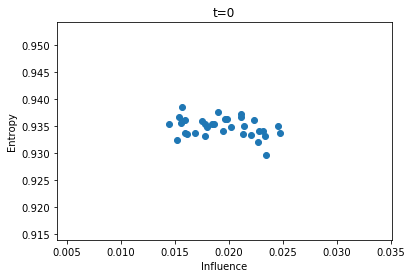

SpearmanrResult(correlation=-0.3155080213903743, pvalue=0.06911897882128647)


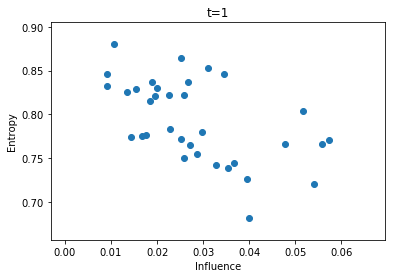

SpearmanrResult(correlation=-0.5883880825057295, pvalue=0.00025226105430920393)


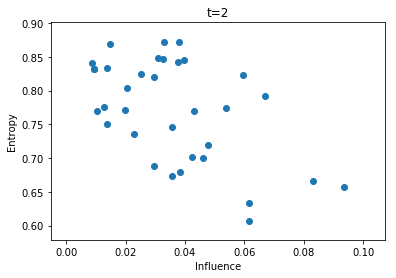

SpearmanrResult(correlation=-0.45332314744079444, pvalue=0.007091992317782477)


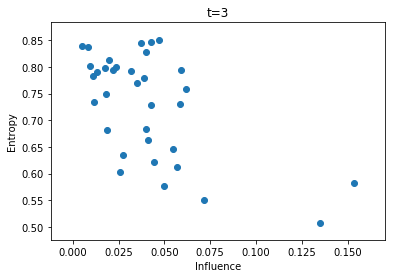

SpearmanrResult(correlation=-0.4985485103132162, pvalue=0.0026913890329437577)


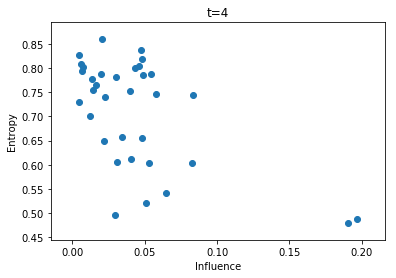

SpearmanrResult(correlation=-0.44415584415584414, pvalue=0.008501015025766395)


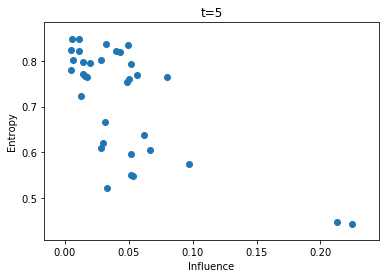

SpearmanrResult(correlation=-0.6305576776165011, pvalue=6.407979439953484e-05)


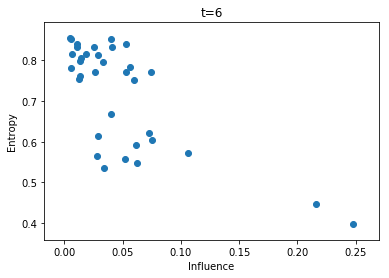

SpearmanrResult(correlation=-0.626890756302521, pvalue=7.276531302864506e-05)


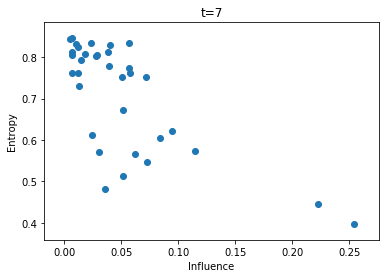

SpearmanrResult(correlation=-0.653475935828877, pvalue=2.7865173992303385e-05)


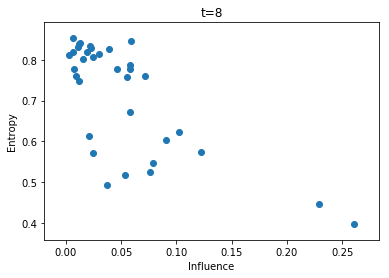

SpearmanrResult(correlation=-0.5972498090145149, pvalue=0.0001921600818121419)


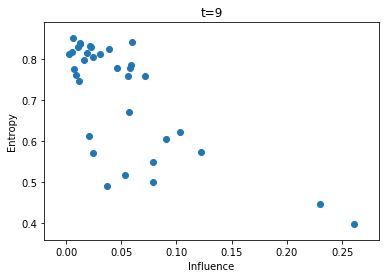

SpearmanrResult(correlation=-0.5966386554621849, pvalue=0.00019585071550859645)


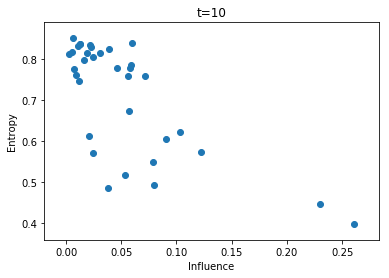

SpearmanrResult(correlation=-0.598472116119175, pvalue=0.00018496476832561456)
[-0.3155080213903743, -0.5883880825057295, -0.45332314744079444, -0.4985485103132162, -0.44415584415584414, -0.6305576776165011, -0.626890756302521, -0.653475935828877, -0.5972498090145149, -0.5966386554621849, -0.598472116119175]


Text(0.5,0,'t')

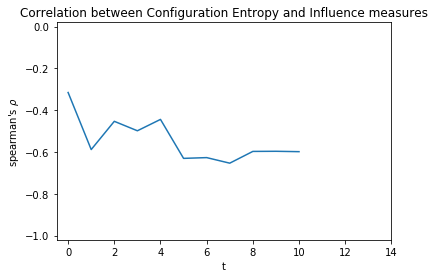

In [730]:
#plot correlation over time between entropy measure and influence measure
s_correlations=[]
for t in range(max(baseline)+1):
    xvalues,yvalues=[diff_seeds[t][seed] for seed in diff_seeds[t]],[entropies[seed][t] for seed in diff_seeds[t]]
    plt.scatter(xvalues,yvalues)
    plt.title("t="+str(t))
    plt.xlabel("Influence")
    plt.ylabel("Entropy")
    plt.show()
    print spearmanr(xvalues,yvalues)
    s_correlations.append(spearmanr(xvalues,yvalues)[0])
print s_correlations
#correlations[s]=s_correlations
#correlations_sim[s]=s_correlations
plt.plot([t for t in range(max(baseline)+1)],s_correlations)
plt.title("Correlation between Configuration Entropy and Influence measures")
plt.ylim([-1.02,.02])
plt.xticks([0,2,4,6,8,10,12,14])
plt.ylabel(r"spearman's $\rho$")
plt.xlabel("t")

In [792]:
#find average results for all networks in the Cell Collective
#NOTE: this takes a while to run and a lot of memory!!
import gc
num=1
cell_influences={}
for index,n in enumerate(sorted(cell_stats,key=lambda x: cell_stats[x]['size'])[:]):
    if cell_stats[n]['max_k']>14: continue
    with open('CANA//null_modules_bf-sim//'+n+'.txt') as fp:
        baseline=eval(fp.read())[()]
    with open('CANA//modules_bf-sim//'+n+'.txt') as fp:
        act_prob_sim=eval(fp.read())
    #find configuration entropy
    #seeds={str(seed) for seed in act_prob_sim if len(seed)==num}
    act_prob_sim={str(seed):act_prob_sim[seed] for seed in act_prob_sim}
    seeds={seed for seed in act_prob_sim if len(eval(seed))==num}
    #NOTE: entropy calculation expects diffusions keyed by timestep; this does not exist for the bruteforce solutions
    if cell_stats[n]['size']<11:
        for seed in seeds: act_prob_sim[seed]={0:act_prob_sim[seed]}
        baseline={0:baseline}
    entropies=seed_entropies(act_prob_sim,seeds,data=False)[0] #NOTE: this takes a moment for larger networks
    avg_entropies={t:np.mean([entropies[seed][t] for seed in seeds]) for t in entropies['(0,)']}
    if cell_stats[n]['size']<11: avg_entropy=avg_entropies[0] #this holds the long-term value
    else: avg_entropy=avg_entropies[10]
    
    #find perturbation influence
    diff={t:np.mean([influence(act_prob_sim[seed],baseline)[t] for seed in seeds]) for t in baseline}
    #diff_seeds={t:{seed:influence(dact_prob_sim[seed],baseline)[t] for seed in seeds} for t in baseline}
    if cell_stats[n]['size']<11: avg_diff=diff[0] #this holds the long-term value
    else: avg_diff=diff[10]
    cell_influences[n]={'avg entropy':avg_entropy, 'avg perturbation':avg_diff}
    print n,cell_stats[n]['size'],avg_entropy,avg_diff

    #clean up memory
    del act_prob_sim
    del entropies
    gc.collect()

Cortical Area Development 5 0.22245456767780833 0.22156250000000002
Cell Cycle Transcription by Coupled CDK and Network Oscillators 9 0.09363306131807653 0.10094225848162616
Mammalian Cell Cycle 2006 10 0.3669290755127327 0.13734436035156247
Toll Pathway of Drosophila Signaling Pathway 11 0.6200576573176252 0.08847066115702479
Metabolic Interactions in the Gut Microbiome 12 0.7007110260842073 0.042713888888888885
Lac Operon 13 0.6628927176200796 0.06253461538461538
Regulation of the L-arabinose operon of Escherichia coli 13 0.6946898454890602 0.04417159763313609
Arabidopsis thaliana Cell Cycle 14 0.43395136128584716 0.20246326530612246
Predicting Variabilities in Cardiac Gene 15 0.6620931314772547 0.05367822222222221
Cardiac development 15 0.6594386114855517 0.05459866666666668
Fanconi anemia and checkpoint recovery 15 0.11813499955669113 0.06414666666666666
Neurotransmitter Signaling Pathway 16 0.4276015977693479 0.0660484375
BT474 Breast Cell Line Short-term ErbB Network 16 0.4555115

In [771]:
#brute-force example
for seed in seeds: print seed,act_prob_sim[seed]
config_entropy({0:act_prob_sim[seed]})

(9,) {'Sp8': 1.0, 'Pax6': 1.0, 'Emx2': 0.0, 'Coup_fti': 0.0, 'Fgf8': 0.25}
(1,) {'Sp8': 0.0, 'Pax6': 0.0, 'Emx2': 1.0, 'Coup_fti': 1.0, 'Fgf8': 0.0}
(8,) {'Sp8': 0.0, 'Pax6': 0.0, 'Emx2': 1.0, 'Coup_fti': 1.0, 'Fgf8': 0.0}
(3,) {'Sp8': 0.125, 'Pax6': 1.0, 'Emx2': 0.0, 'Coup_fti': 0.875, 'Fgf8': 0.125}
(5,) {'Sp8': 1.0, 'Pax6': 1.0, 'Emx2': 0.0, 'Coup_fti': 0.0, 'Fgf8': 1.0}
(7,) {'Sp8': 0.125, 'Pax6': 0.0, 'Emx2': 0.875, 'Coup_fti': 1.0, 'Fgf8': 0.125}
(0,) {'Sp8': 0.25, 'Pax6': 0.25, 'Emx2': 0.0, 'Coup_fti': 0.75, 'Fgf8': 0.25}
(4,) {'Sp8': 0.0, 'Pax6': 0.0, 'Emx2': 1.0, 'Coup_fti': 1.0, 'Fgf8': 0.0}
(2,) {'Sp8': 0.125, 'Pax6': 0.0, 'Emx2': 0.875, 'Coup_fti': 0.875, 'Fgf8': 0.125}
(6,) {'Sp8': 0.125, 'Pax6': 0.125, 'Emx2': 0.0, 'Coup_fti': 0.0, 'Fgf8': 0.125}


({0: 0.3261386659197578}, {0: 0.0466472303206997})

Comparing 74 networks
SpearmanrResult(correlation=-0.263176601258793, pvalue=0.02348292996448758)


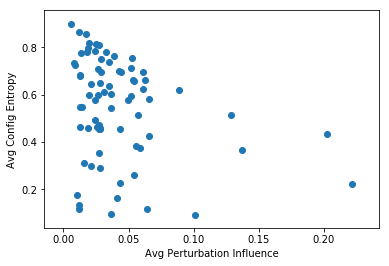

In [796]:
#compare average configuration entropy and average perturbation influence across networks
num=1
subnetworks=[n for n in cell_stats if cell_stats[n]['max_k']<15]
print 'Comparing %d networks' % len(subnetworks)

xvalues=[cell_influences[n]['avg perturbation'] for n in subnetworks]
yvalues=[cell_influences[n]['avg entropy'] for n in subnetworks]
plt.scatter(xvalues,yvalues)
plt.xlabel("Avg Perturbation Influence")
plt.ylabel("Avg Config Entropy")
print spearmanr(xvalues,yvalues)

In [890]:
#additionally, find average correlation results for all networks in the Cell Collective
#NOTE: to save memory, this only stores one time step, T=10
import gc
num=1
#entropies={}
#diffs={}
#correlations={}
for index,n in enumerate(sorted(cell_stats,key=lambda x: cell_stats[x]['size'])[:]):
    if cell_stats[n]['size']>20: continue
    with open('CANA//null_modules_bf-sim//'+n+'.txt') as fp:
        baseline=eval(fp.read())[()]
    with open('CANA//modules_bf-sim//'+n+'.txt') as fp:
        act_prob_sim=eval(fp.read())

    #find configuration entropy
    act_prob_sim={str(seed):act_prob_sim[seed] for seed in act_prob_sim if len(seed)==num}
    seeds=act_prob_sim.keys()
    #NOTE: entropy calculation expects diffusions keyed by timestep; this does not exist for the bruteforce solutions
    if cell_stats[n]['size']<11:
        for seed in seeds: act_prob_sim[seed]={0:act_prob_sim[seed]}
        baseline={0:baseline}
    else:
        for seed in seeds: act_prob_sim[seed]={0:act_prob_sim[seed][10]} #save one time step to save memory
        baseline={0:baseline[10]}
    entropies[n]=seed_entropies(act_prob_sim,seeds,data=False)[0] #NOTE: this takes a moment for larger networks
    entropies[n]={seed:entropies[n][seed][0] for seed in seeds} #remove the false 0 time step
    #find perturbation influence
    diffs[n]={seed:influence(act_prob_sim[seed],baseline)[0] for seed in seeds}
    print n,cell_stats[n]['size'],len(entropies[n]),len(diffs[n])
    
    #calculate the spearman rank correlation
    xvalues=[entropies[n][seed] for seed in entropies[n]]
    yvalues=[diffs[n][seed] for seed in entropies[n]]
    correlations[n]=spearmanr(xvalues,yvalues)
    #print len(xvalues),len(yvalues),spearmanr(xvalues,yvalues)

    #clean up memory
    del act_prob_sim
    gc.collect()

Signaling in Macrophage Activation 321 642 642


In [894]:
print len(entropies),len(diffs),len(correlations)
#corr={seed:{'correlation':correlations[seed][0],'pvalue':correlations[seed][1]} for seed in correlations}
#with open('cell_collective_influence_correlations.txt','w') as fp:
#    fp.write(str(corr))
#with open('cell_collective_entropies_t10.txt','w') as fp:
#    fp.write(str(entropies))
#with open('cell_collective_perturbation_t10.txt','w') as fp:
#    fp.write(str(diffs))

74 74 74


In [888]:
with open('cell_collective_influence_correlations.txt') as fp:
    corr=eval(fp.read())
with open('cell_collective_entropies_t10.txt') as fp:
    ent=eval(fp.read())
with open('cell_collective_perturbation_t10.txt') as fp:
    pdif=eval(fp.read())

Comparing 74 networks
-0.20076675773761035


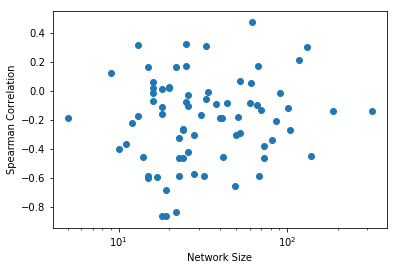

In [900]:
#plot correlations per network size for s=1
num=1
subnetworks=[n for n in cell_stats if cell_stats[n]['max_k']<15]
print 'Comparing %d networks' % len(subnetworks)

xvalues=[cell_stats[n]['size'] for n in subnetworks]
yvalues=[corr[n]['correlation'] for n in subnetworks]
#print(zip(xvalues,yvalues))
plt.scatter(xvalues,yvalues)
plt.xlabel("Network Size")
plt.ylabel("Spearman Correlation")
plt.xscale('log',basex=10)
#print spearmanr(xvalues,yvalues)
print np.mean(yvalues)

SpearmanrResult(correlation=-0.18657331708742975, pvalue=0.6057834208649142)


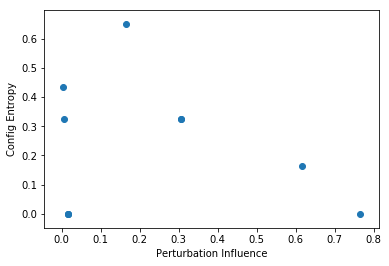

In [906]:
#plot correlations for a specific network for size for s=1
n='Signaling in Macrophage Activation' #Body Segmentation in Drosophila 2013, Signaling in Macrophage Activation
n='Cortical Area Development'

xvalues=[diffs[n][seed] for seed in diffs[n]]
yvalues=[entropies[n][seed] for seed in diffs[n]]
#print(zip(xvalues,yvalues))
plt.scatter(xvalues,yvalues)
plt.xlabel("Perturbation Influence")
plt.ylabel("Config Entropy")
print spearmanr(xvalues,yvalues)